In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

import easygui as ey
import warnings

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [3]:
df_current = pd.read_csv("Apartment Building Evaluations 2023 - current.csv")

In [4]:
df_current.head()

_id      RSN  YEAR REGISTERED  YEAR BUILT  YEAR EVALUATED PROPERTY TYPE  \
0    1  4156580           2017.0      1967.0            2023       PRIVATE   
1    2  4156579           2017.0      1967.0            2023       PRIVATE   
2    3  4154927           2017.0      1963.0            2023       PRIVATE   
3    4  4154926           2017.0      1964.0            2023       PRIVATE   
4    5  4154925           2017.0      1963.0            2024       PRIVATE   

  WARD         WARDNAME        SITE ADDRESS  CONFIRMED STOREYS  \
0   16  Don Valley East  1200 YORK MILLS RD                 16   
1   16  Don Valley East  1202 YORK MILLS RD                 22   
2   16  Don Valley East  1210 YORK MILLS RD                 10   
3   16  Don Valley East  1216 YORK MILLS RD                  8   
4   16  Don Valley East  1222 YORK MILLS RD                  4   

   CONFIRMED UNITS EVALUATION COMPLETED ON  CURRENT BUILDING EVAL SCORE  \
0              222              2023-07-17                         90.0   
1              219              2023-08-03                         85.0   
2               91              2023-08-02                         91.0   
3               65              2023-07-17                         95.0   
4               25              2024-08-19                         95.0   

   PROACTIVE BUILDING SCORE  CURRENT REACTIVE SCORE  NO OF AREAS EVALUATED  \
0                      90.0                       0                     41   
1                      85.0                       0                     41   
2                      91.0                       0                     43   
3                      95.0                       0                     46   
4                      95.0                       0                     42   

   NUMBERING OF PROPERTY  EXTERIOR GROUNDS FENCING  RETAINING WALLS  \
0                      3               3.0     NaN              NaN   
1                      3               NaN       2              NaN   
2                      3               2.0       1              NaN   
3                      3               3.0       2              3.0   
4                      3               3.0       2              3.0   

   CATCH BASINS / STORM DRAINAGE  BUILDING EXTERIOR  BALCONY GUARDS  WINDOWS  \
0                            NaN                3.0             2.0      3.0   
1                            2.0                2.0             2.0      3.0   
2                            3.0                3.0             3.0      3.0   
3                            3.0                2.0             3.0      3.0   
4                            3.0                2.0             3.0      3.0   

  EXT. RECEPTACLE STORAGE AREA  EXTERIOR WALKWAYS  CLOTHING DROP BOXES  \
0                            3                3.0                  NaN   
1                          NaN                3.0                  NaN   
2                            2                3.0                  NaN   
3                            2                3.0                  NaN   
4                            3                2.0                  NaN   

   ACCESSORY BUILDINGS  INTERCOM  EMERGENCY CONTACT SIGN  \
0                  NaN       3.0                       3   
1                  NaN       3.0                       3   
2                  NaN       3.0                       3   
3                  3.0       3.0                       3   
4                  NaN       3.0                       3   

   LOBBY - WALLS AND CEILING LOBBY FLOORS LAUNDRY ROOM  \
0                        3.0            3            3   
1                        3.0            3            2   
2                        2.0            3            3   
3                        3.0            3            3   
4                        2.0            3            3   

  INT. RECEPTACLE STORAGE AREA  MAIL RECEPTACLES  EXTERIOR DOORS  \
0                          NaN               3.0             3.0   
1                 

In [5]:
df_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   _id                             3572 non-null   int64  
 1   RSN                             3572 non-null   int64  
 2   YEAR REGISTERED                 3515 non-null   float64
 3   YEAR BUILT                      3555 non-null   float64
 4   YEAR EVALUATED                  3572 non-null   int64  
 5   PROPERTY TYPE                   3572 non-null   object 
 6   WARD                            3572 non-null   object 
 7   WARDNAME                        3571 non-null   object 
 8   SITE ADDRESS                    3572 non-null   object 
 9   CONFIRMED STOREYS               3572 non-null   int64  
 10  CONFIRMED UNITS                 3572 non-null   int64  
 11  EVALUATION COMPLETED ON         3572 non-null   object 
 12  CURRENT BUILDING EVAL SCORE     35

In [6]:
round(df_current.isnull().sum()[df_current.isnull().sum() > 0] / df_current.shape[0] * 100, 2)

YEAR REGISTERED                    1.60
YEAR BUILT                         0.48
WARDNAME                           0.03
EXTERIOR GROUNDS                   1.06
FENCING                           25.84
RETAINING WALLS                   53.78
CATCH BASINS / STORM DRAINAGE     21.58
BUILDING EXTERIOR                  0.25
BALCONY GUARDS                    32.89
WINDOWS                            0.08
EXT. RECEPTACLE STORAGE AREA       9.27
EXTERIOR WALKWAYS                  0.92
CLOTHING DROP BOXES               91.71
ACCESSORY BUILDINGS               85.86
INTERCOM                           1.60
LOBBY - WALLS AND CEILING          0.73
LOBBY FLOORS                       0.70
LAUNDRY ROOM                       4.82
INT. RECEPTACLE STORAGE AREA      77.41
MAIL RECEPTACLES                   7.08
EXTERIOR DOORS                     0.06
STORAGE AREAS/LOCKERS MAINT.      48.46
POOLS                             93.37
OTHER AMENITIES                   78.25
PARKING AREAS                     10.83


In [7]:
idx = [i for i in df_current["YEAR REGISTERED"][df_current["YEAR REGISTERED"].isna()].index]

In [8]:
for i in df_current["YEAR BUILT"][df_current["YEAR BUILT"].isna()].index:
    if i not in idx:
        idx.append(i)

In [9]:
for i in df_current["WARDNAME"][df_current["WARDNAME"].isna()].index:
    if i not in idx:
        idx.append(i)

In [10]:
df_current.drop(index = idx, inplace = True)

In [11]:
t_df_current = df_current.drop(columns = ["LATITUDE", "LONGITUDE", "X", "Y"])
t_df_current.fillna(-1, inplace = True)

In [12]:
for i in t_df_current.columns:
    df_current[i] = t_df_current[i]

In [13]:
df_current.dropna(inplace = True)

In [14]:
df_current.isnull().sum()

_id                               0
RSN                               0
YEAR REGISTERED                   0
YEAR BUILT                        0
YEAR EVALUATED                    0
PROPERTY TYPE                     0
WARD                              0
WARDNAME                          0
SITE ADDRESS                      0
CONFIRMED STOREYS                 0
CONFIRMED UNITS                   0
EVALUATION COMPLETED ON           0
CURRENT BUILDING EVAL SCORE       0
PROACTIVE BUILDING SCORE          0
CURRENT REACTIVE SCORE            0
NO OF AREAS EVALUATED             0
NUMBERING OF PROPERTY             0
EXTERIOR GROUNDS                  0
FENCING                           0
RETAINING WALLS                   0
CATCH BASINS / STORM DRAINAGE     0
BUILDING EXTERIOR                 0
BALCONY GUARDS                    0
WINDOWS                           0
EXT. RECEPTACLE STORAGE AREA      0
EXTERIOR WALKWAYS                 0
CLOTHING DROP BOXES               0
ACCESSORY BUILDINGS         

### Univariate Analysis

In [15]:
def univariate_plot(data, col):
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15,8])
    fig.suptitle(f"Univariate Analysis : {col}")
    
    sns.histplot(data = data, x = col, ax = ax1)
    ax1.set_title("HistPlot")

    sns.boxplot(data = data, x = col, ax = ax2)
    ax2.set_title("BoxPlot")

    plt.tight_layout()
    plt.show()

YEAR REGISTERED

In [16]:
df_current["YEAR REGISTERED"].describe().reset_index().T

0           1         2       3       4       5       6  \
index             count        mean       std     min     25%     50%     75%   
YEAR REGISTERED  3382.0  2017.40893  1.348858  2017.0  2017.0  2017.0  2017.0   

                      7  
index               max  
YEAR REGISTERED  2024.0

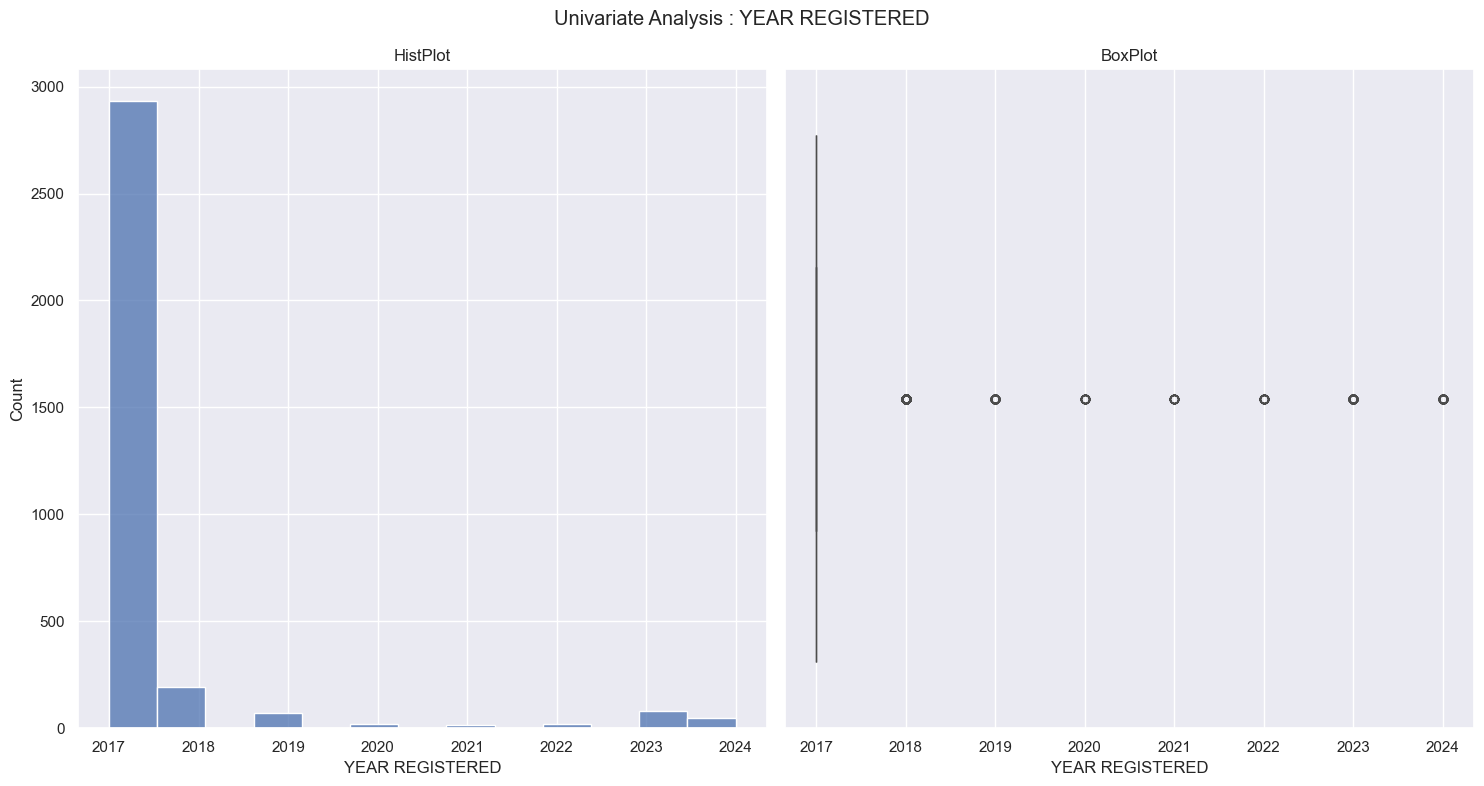

In [17]:
univariate_plot(df_current, "YEAR REGISTERED")

YEAR BUILT

In [18]:
df_current["YEAR BUILT"].describe().reset_index().T

0            1          2       3       4       5       6  \
index        count         mean        std     min     25%     50%     75%   
YEAR BUILT  3382.0  1961.541396  19.361424  1805.0  1955.0  1961.0  1970.0   

                 7  
index          max  
YEAR BUILT  2023.0

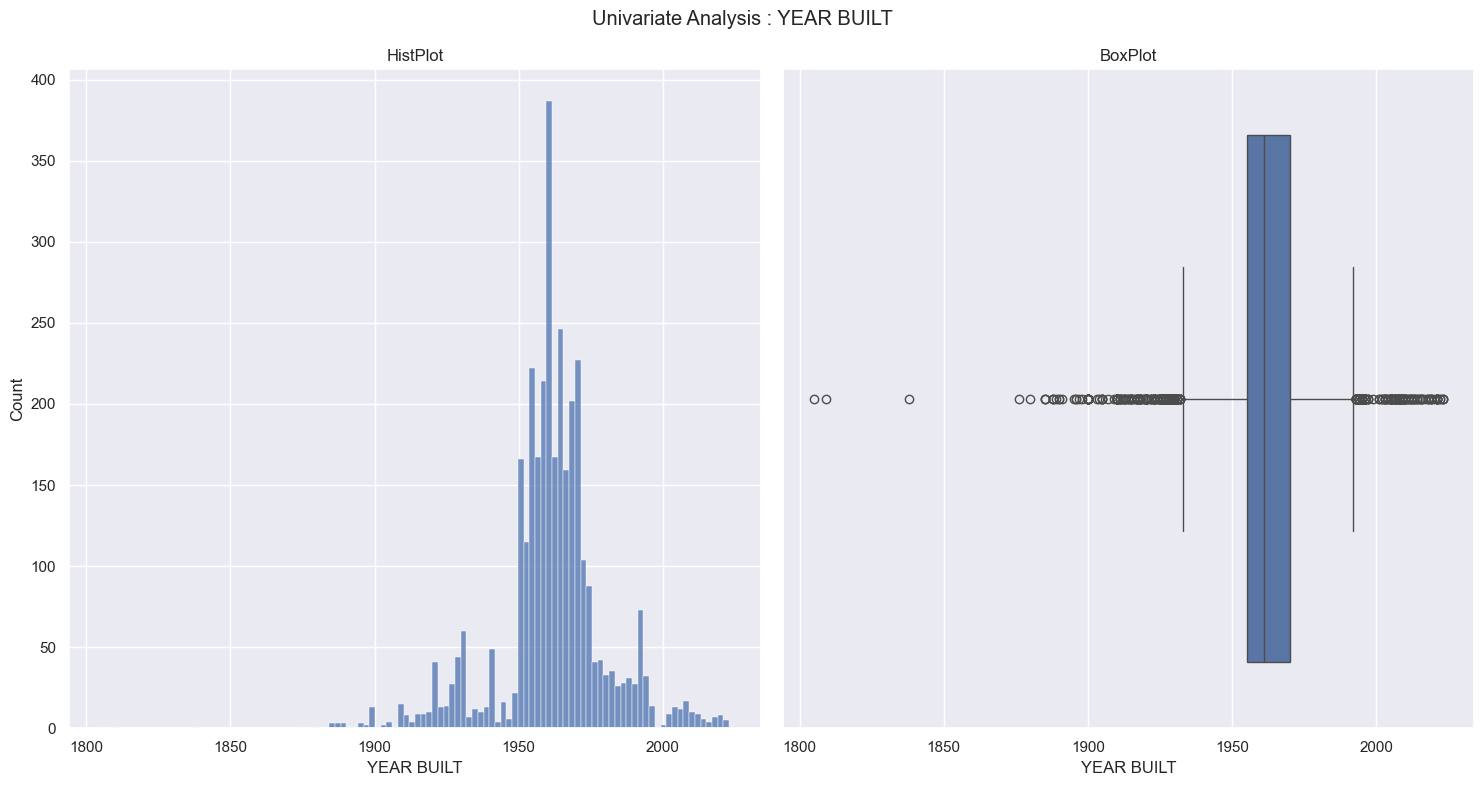

In [19]:
univariate_plot(df_current, "YEAR BUILT")

YEAR EVALUATED

In [20]:
df_current["YEAR EVALUATED"].describe().reset_index().T

0            1         2       3       4       5       6  \
index            count         mean       std     min     25%     50%     75%   
YEAR EVALUATED  3382.0  2023.508279  0.500005  2023.0  2023.0  2024.0  2024.0   

                     7  
index              max  
YEAR EVALUATED  2024.0

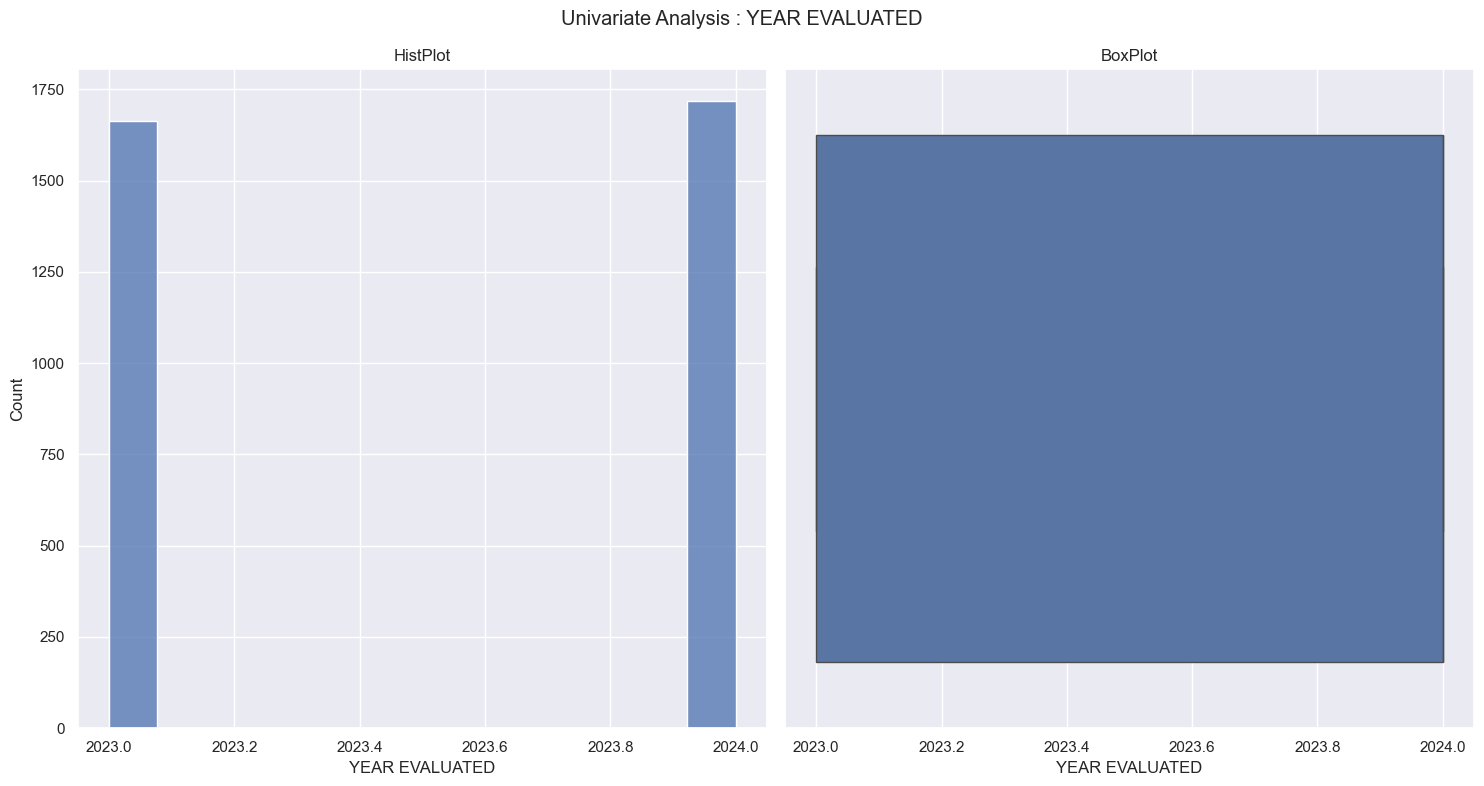

In [21]:
univariate_plot(df_current, "YEAR EVALUATED")

CONFIRMED STOREYS

In [22]:
df_current["CONFIRMED STOREYS"].describe().reset_index().T

0        1        2    3    4    5     6     7
index               count     mean      std  min  25%  50%   75%   max
CONFIRMED STOREYS  3382.0  7.62123  6.25609  3.0  3.0  4.0  10.0  51.0

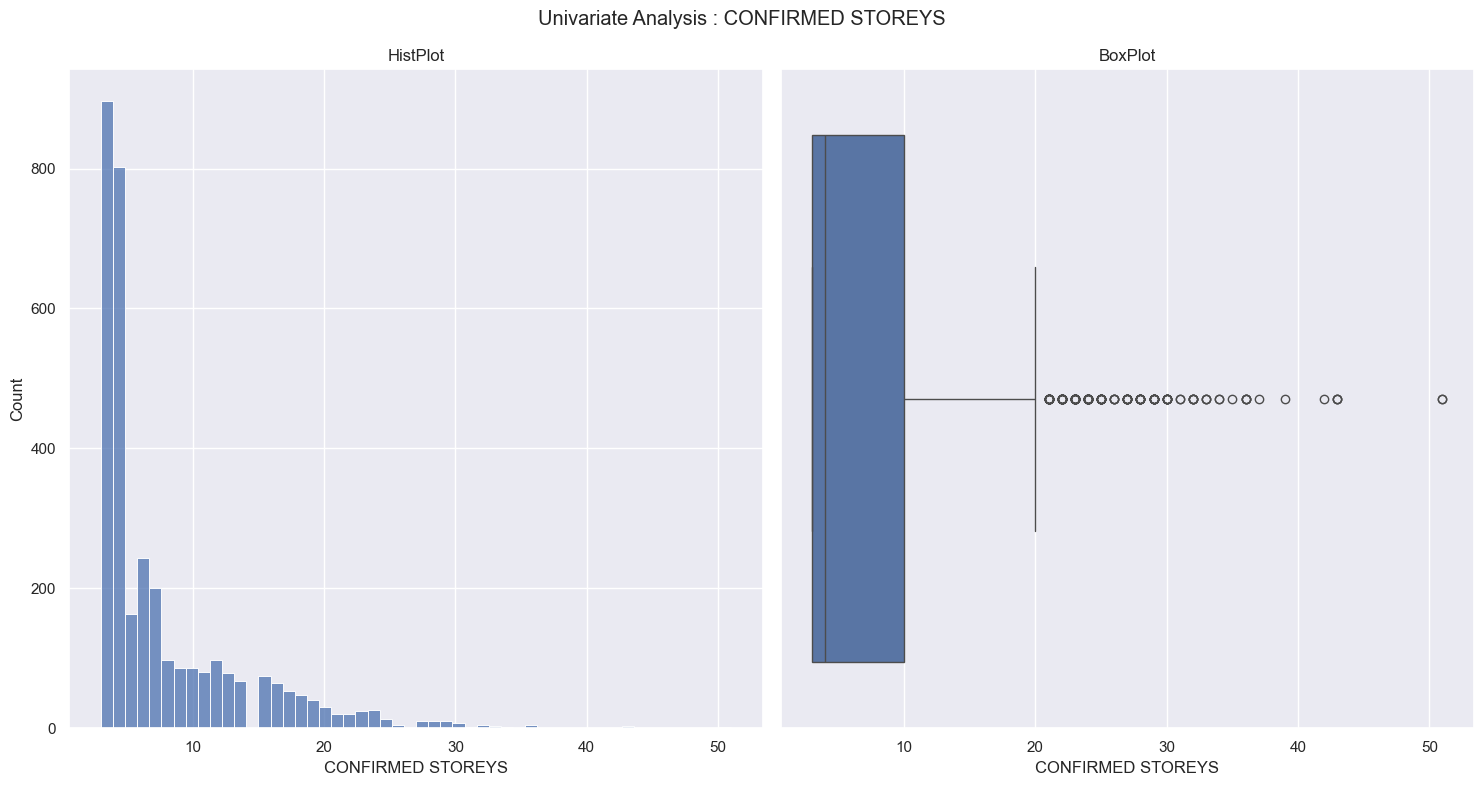

In [23]:
univariate_plot(df_current, "CONFIRMED STOREYS")

CONFIRMED UNITS

In [24]:
df_current["CONFIRMED UNITS"].describe().reset_index().T

0          1          2     3     4     5       6      7
index             count       mean        std   min   25%   50%     75%    max
CONFIRMED UNITS  3382.0  88.257244  95.207512  10.0  24.0  49.5  120.75  793.0

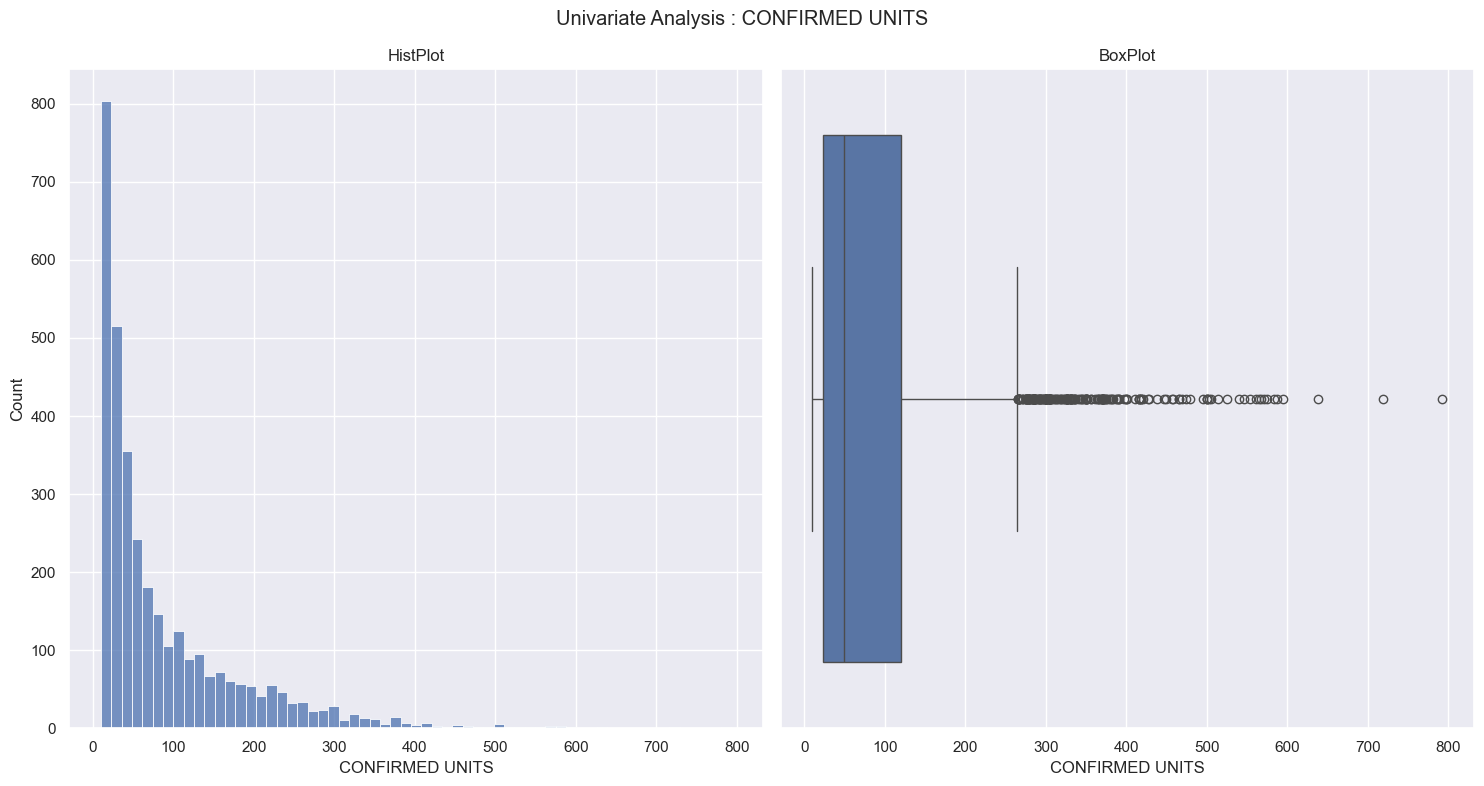

In [25]:
univariate_plot(df_current, "CONFIRMED UNITS")

CURRENT BUILDING EVAL SCORE

In [26]:
df_current["CURRENT BUILDING EVAL SCORE"].describe().reset_index().T

0          1         2     3     4     5  \
index                         count       mean       std   min   25%   50%   
CURRENT BUILDING EVAL SCORE  3382.0  87.109107  8.610448  17.0  83.0  89.0   

                                6      7  
index                         75%    max  
CURRENT BUILDING EVAL SCORE  93.0  100.0

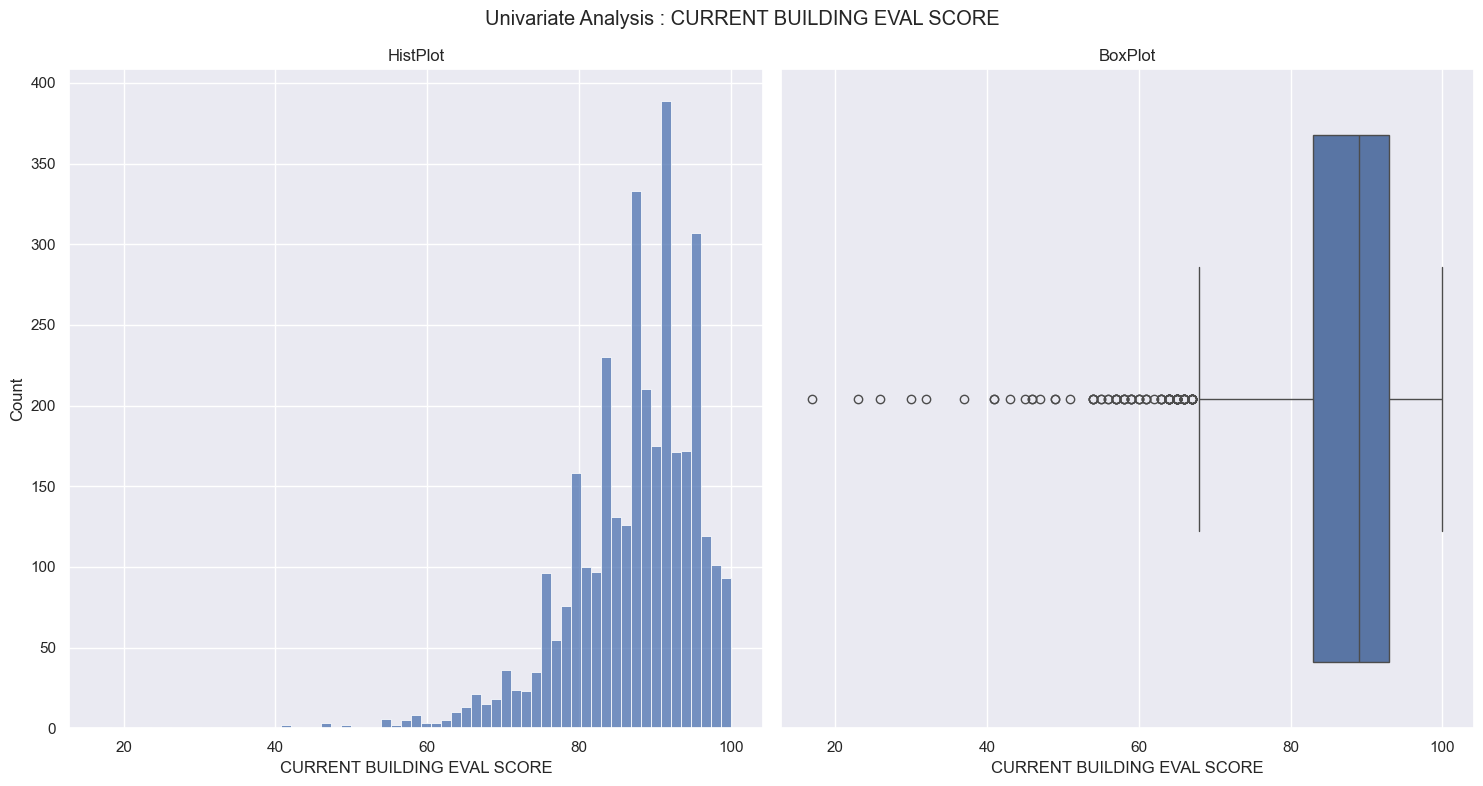

In [27]:
univariate_plot(df_current, "CURRENT BUILDING EVAL SCORE")

PROACTIVE BUILDING SCORE

In [28]:
df_current["PROACTIVE BUILDING SCORE"].describe().reset_index().T

0          1         2     3     4     5     6  \
index                      count       mean       std   min   25%   50%   75%   
PROACTIVE BUILDING SCORE  3382.0  87.279716  8.501881  17.0  83.0  89.0  93.0   

                              7  
index                       max  
PROACTIVE BUILDING SCORE  100.0

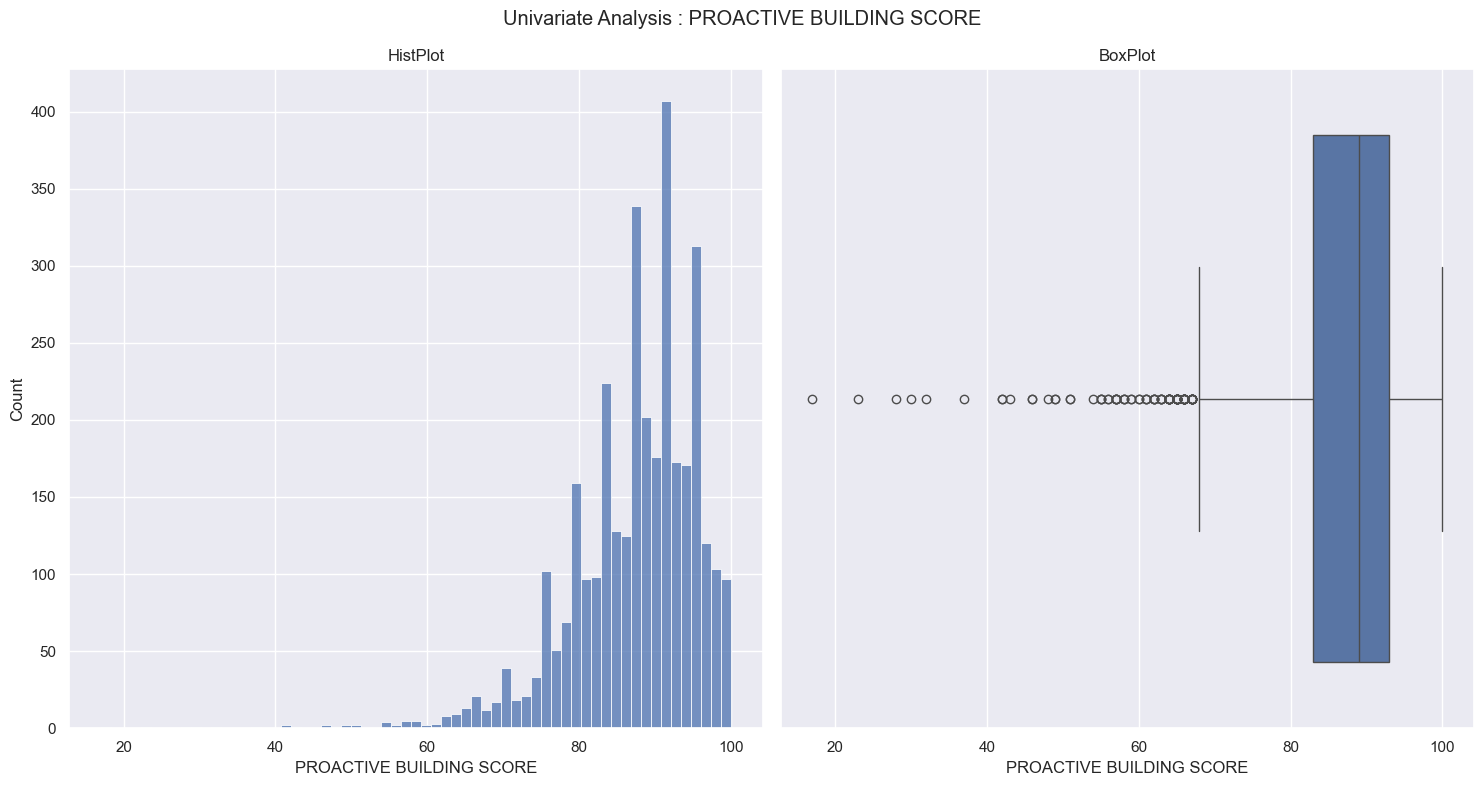

In [29]:
univariate_plot(df_current, "PROACTIVE BUILDING SCORE")

CURRENT REACTIVE SCORE

In [30]:
df_current["CURRENT REACTIVE SCORE"].describe().reset_index().T

0         1         2     3    4    5    6    7
index                    count      mean       std   min  25%  50%  75%  max
CURRENT REACTIVE SCORE  3382.0 -0.170609  0.595894 -14.0  0.0  0.0  0.0  0.0

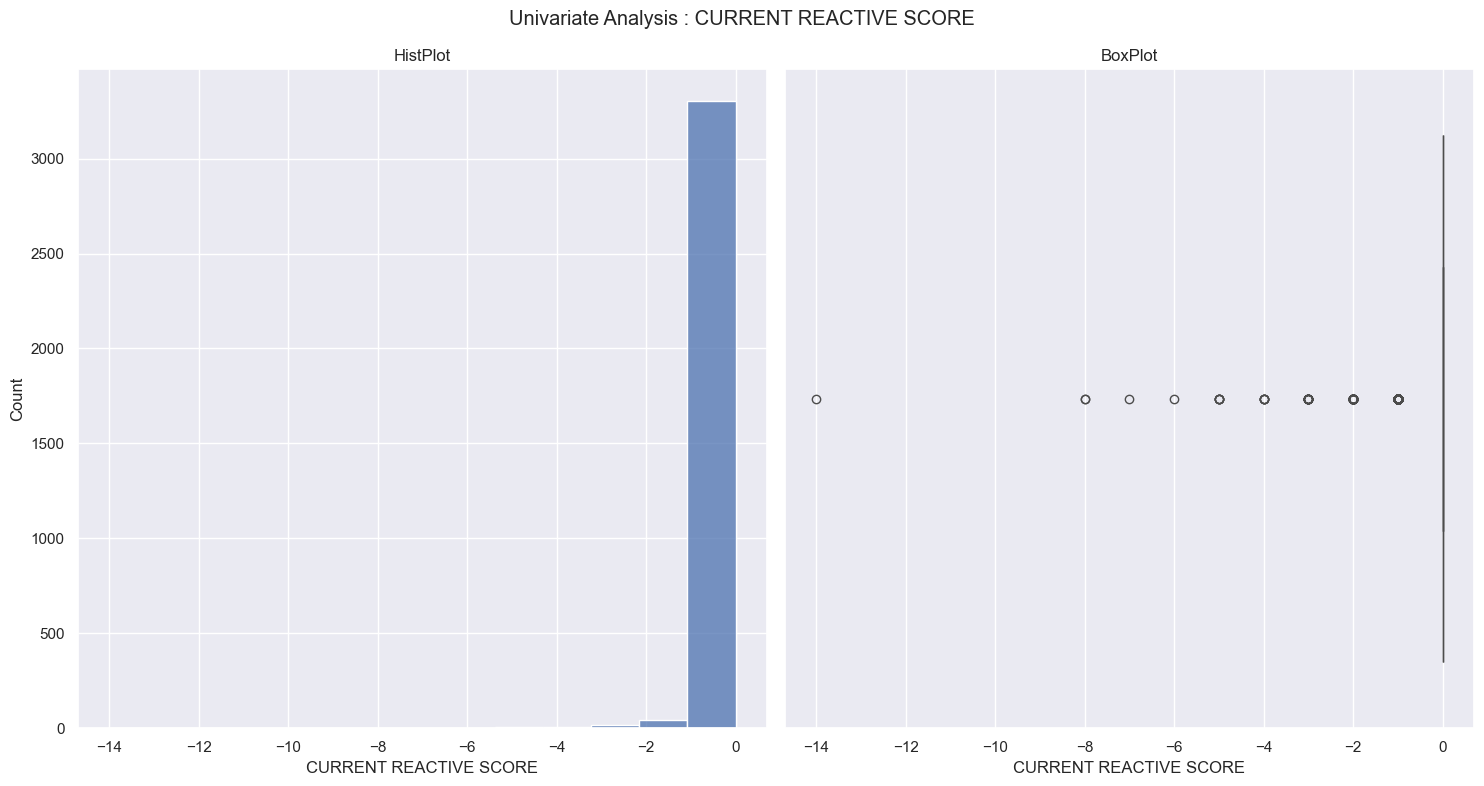

In [31]:
univariate_plot(df_current, "CURRENT REACTIVE SCORE")

NO OF AREAS EVALUATED

In [32]:
df_current["NO OF AREAS EVALUATED"].describe().reset_index().T

0          1         2     3     4     5     6  \
index                   count       mean       std   min   25%   50%   75%   
NO OF AREAS EVALUATED  3382.0  41.212892  3.656531  27.0  38.0  42.0  44.0   

                          7  
index                   max  
NO OF AREAS EVALUATED  49.0

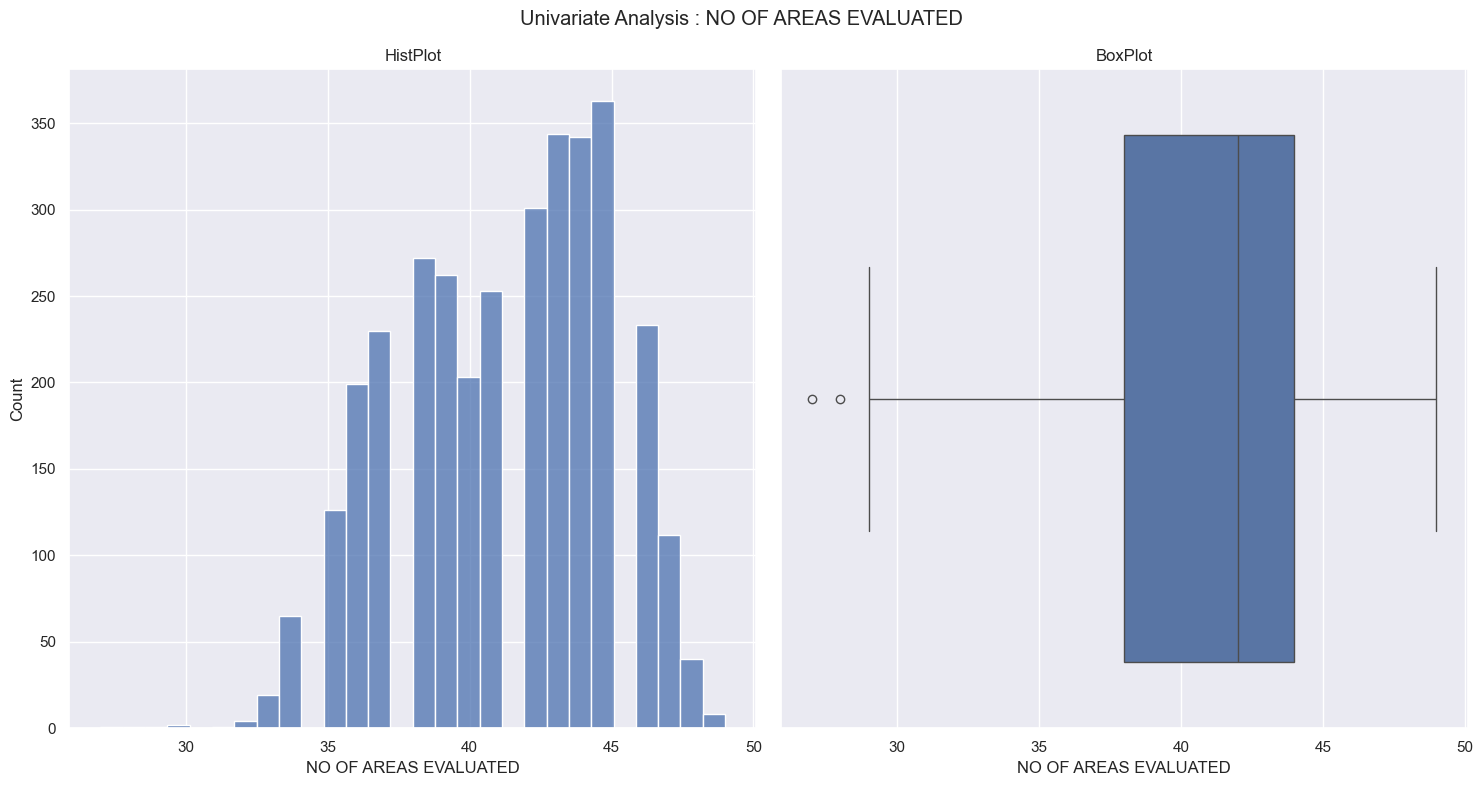

In [33]:
univariate_plot(df_current, "NO OF AREAS EVALUATED")

### Bivariate Analysis

YEAR BUILT vs CURRENT BUILDING EVAL SCORE

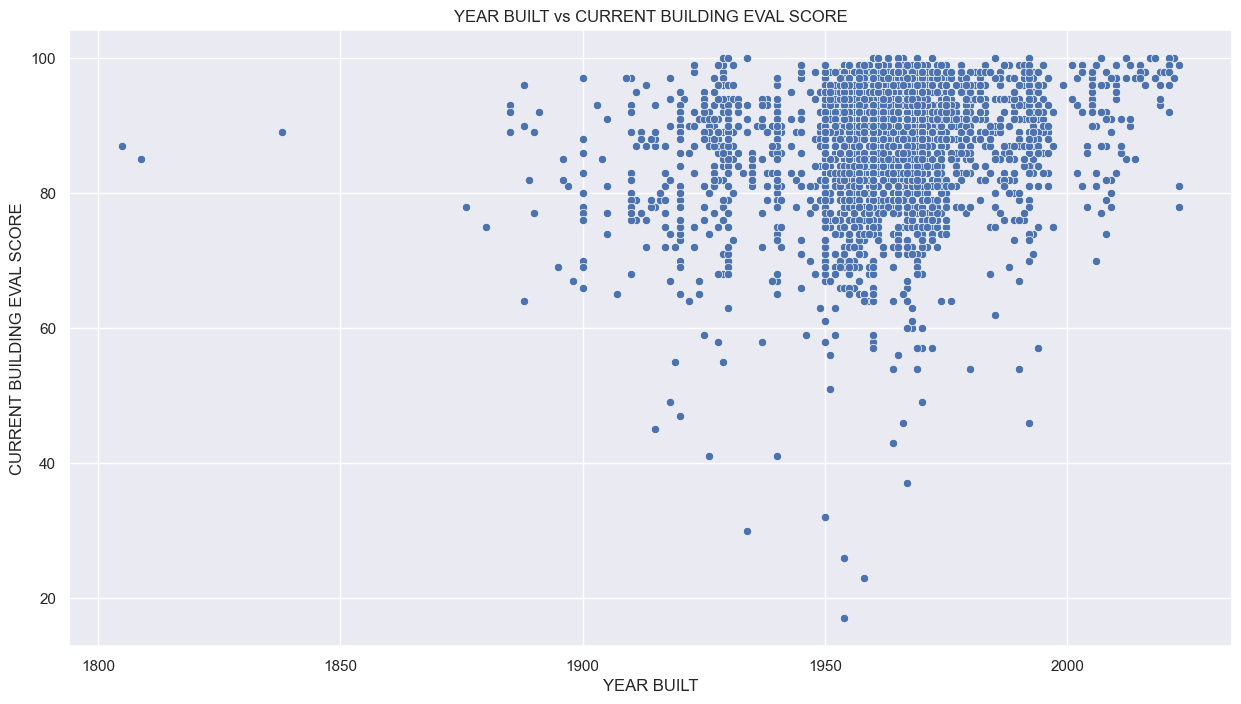

In [34]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_current, x = "YEAR BUILT", y = "CURRENT BUILDING EVAL SCORE")
plt.title("YEAR BUILT vs CURRENT BUILDING EVAL SCORE")
plt.show()

CONFIRMED UNITS vs PROACTIVE BUILDING SCORE

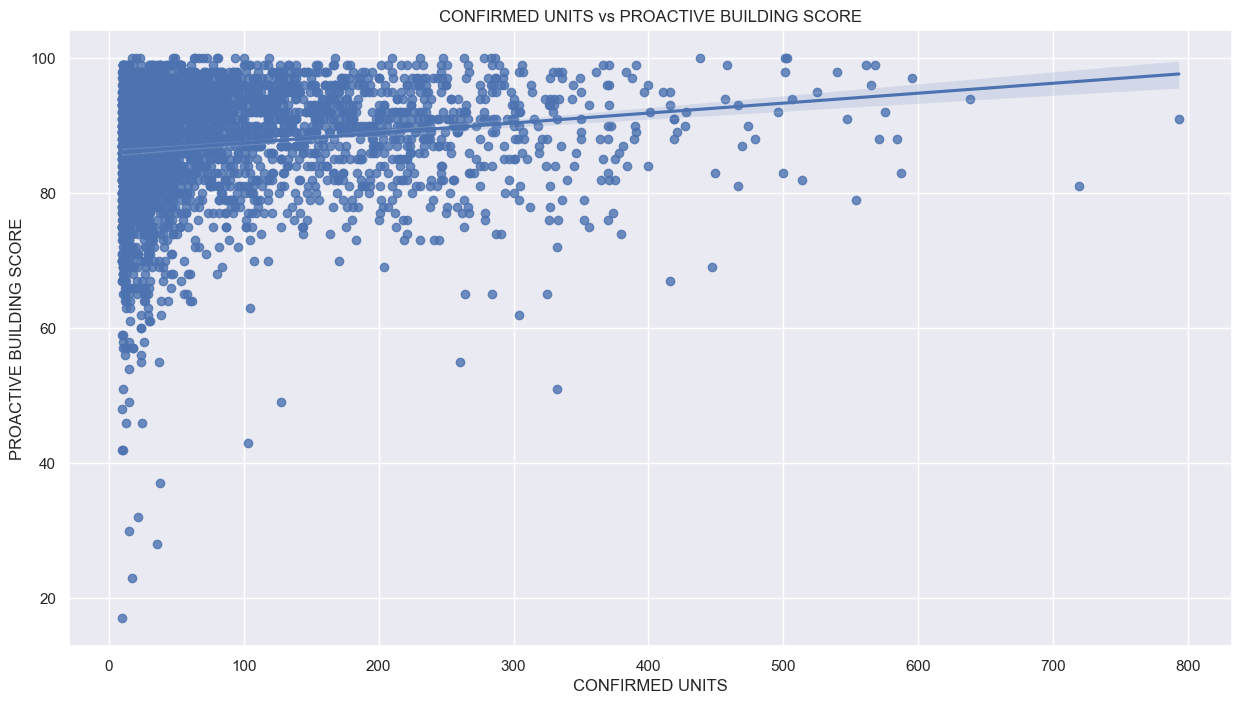

In [35]:
plt.figure(figsize = [15,8])
sns.regplot(data = df_current, x = "CONFIRMED UNITS", y = "PROACTIVE BUILDING SCORE")
plt.title("CONFIRMED UNITS vs PROACTIVE BUILDING SCORE")
plt.show()

WARD vs CURRENT BUILDING EVAL SCORE

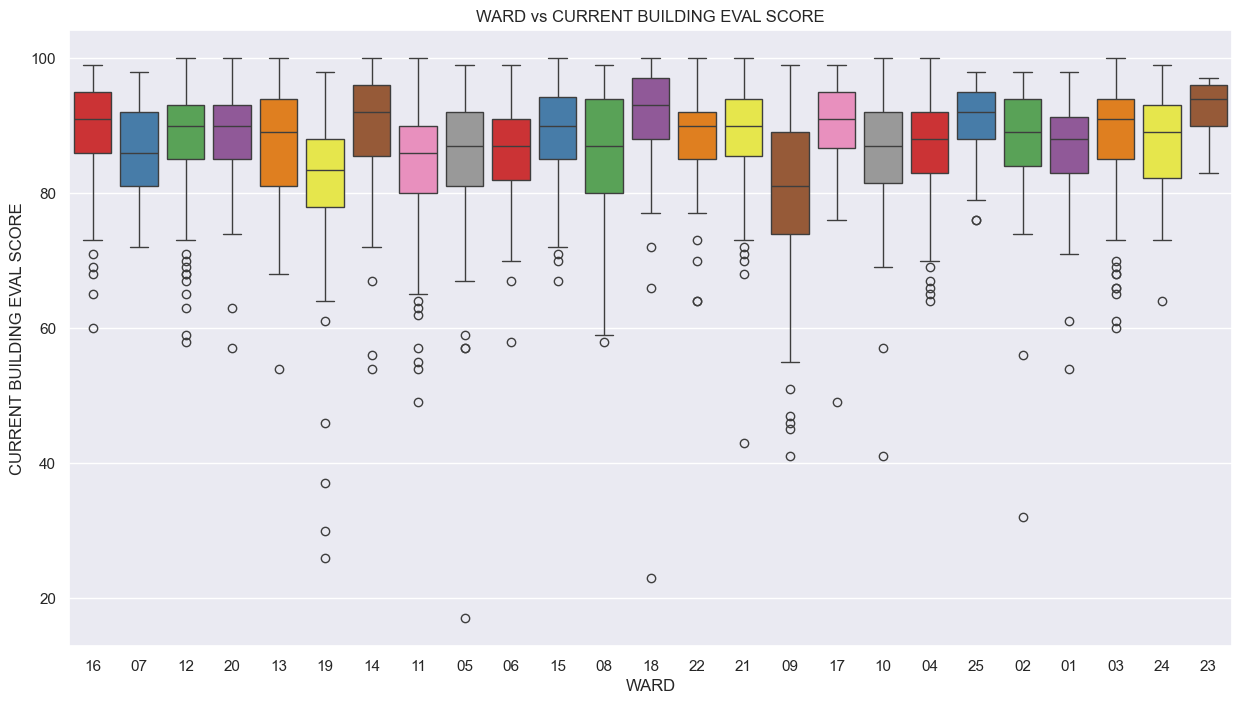

In [36]:
plt.figure(figsize = [15,8])
sns.boxplot(data = df_current, x = "WARD", y = "CURRENT BUILDING EVAL SCORE", palette = "Set1")
plt.title("WARD vs CURRENT BUILDING EVAL SCORE")
plt.show()

PROPERTY TYPE vs CURRENT REACTIVE SCORE

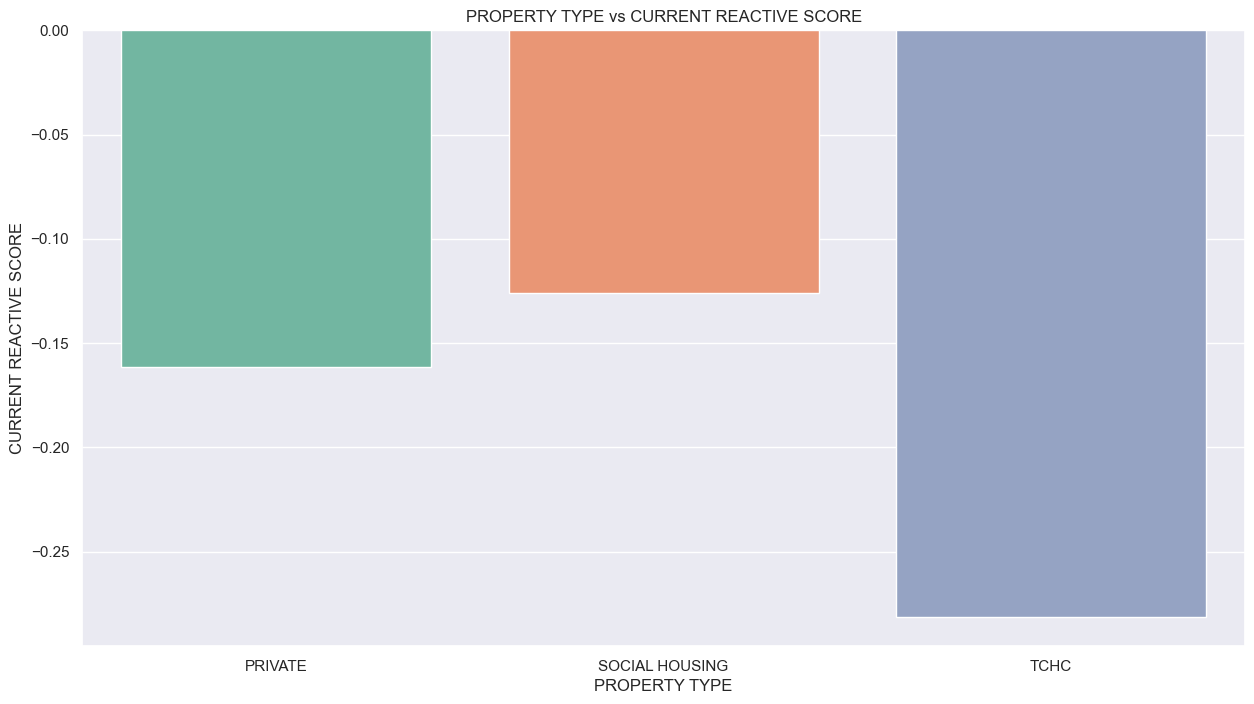

In [37]:
plt.figure(figsize = [15,8])
sns.barplot(data = df_current, x = "PROPERTY TYPE", y = "CURRENT REACTIVE SCORE", palette = "Set2", errorbar=('ci', 0))
plt.title("PROPERTY TYPE vs CURRENT REACTIVE SCORE")
plt.show()

YEAR EVALUATED vs CURRENT BUILDING EVAL SCORE

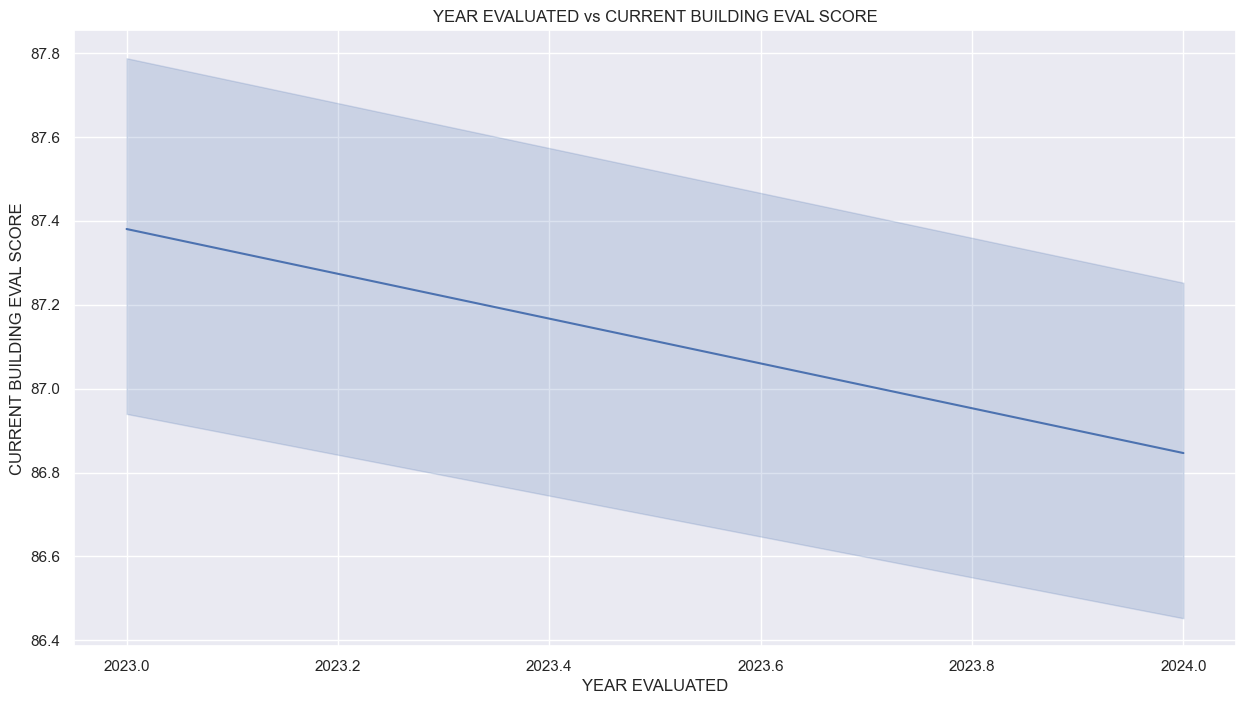

In [38]:
plt.figure(figsize = [15,8])
sns.lineplot(data = df_current, x = "YEAR EVALUATED", y = "CURRENT BUILDING EVAL SCORE")
plt.title("YEAR EVALUATED vs CURRENT BUILDING EVAL SCORE")
plt.show()

### Multivariate Analysis

YEAR BUILT, CONFIRMED UNITS, and CURRENT BUILDING EVAL SCORE

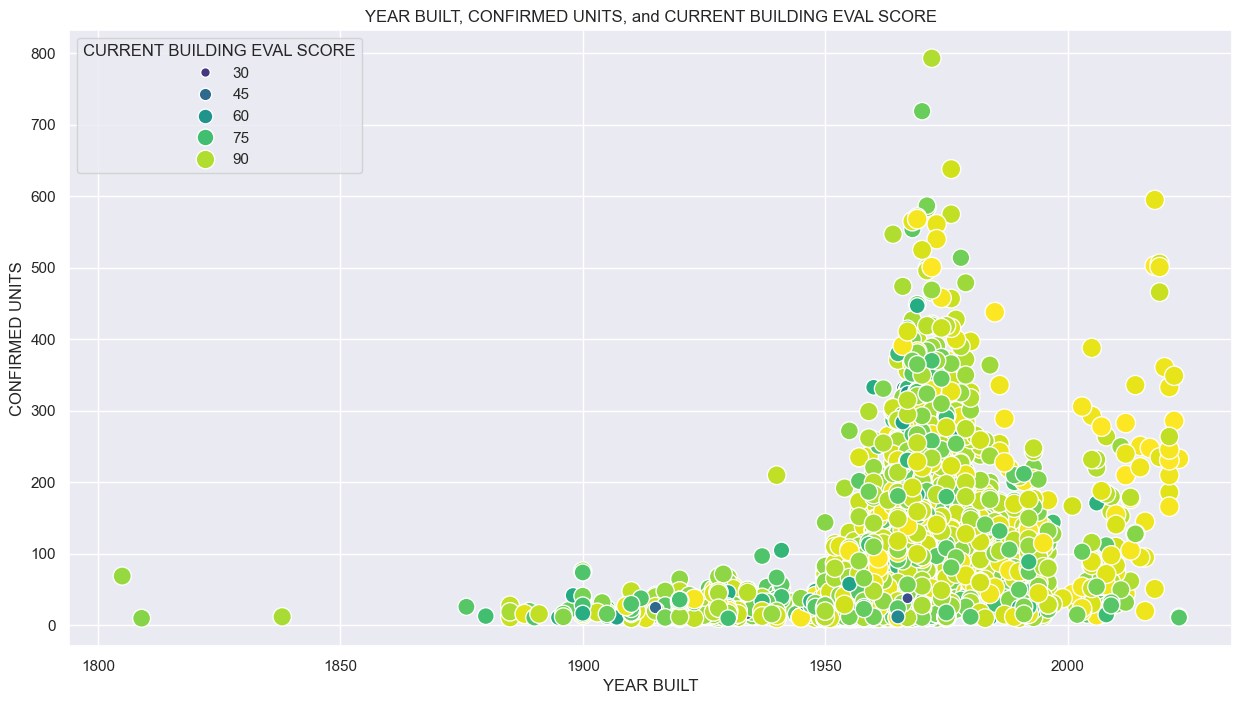

In [39]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_current, x = 'YEAR BUILT', y = 'CONFIRMED UNITS', 
                hue='CURRENT BUILDING EVAL SCORE', palette = 'viridis', 
                size = 'CURRENT BUILDING EVAL SCORE', sizes = (20, 200))
plt.title("YEAR BUILT, CONFIRMED UNITS, and CURRENT BUILDING EVAL SCORE")
plt.show()

PROPERTY TYPE, WARD, and PROACTIVE BUILDING SCORE

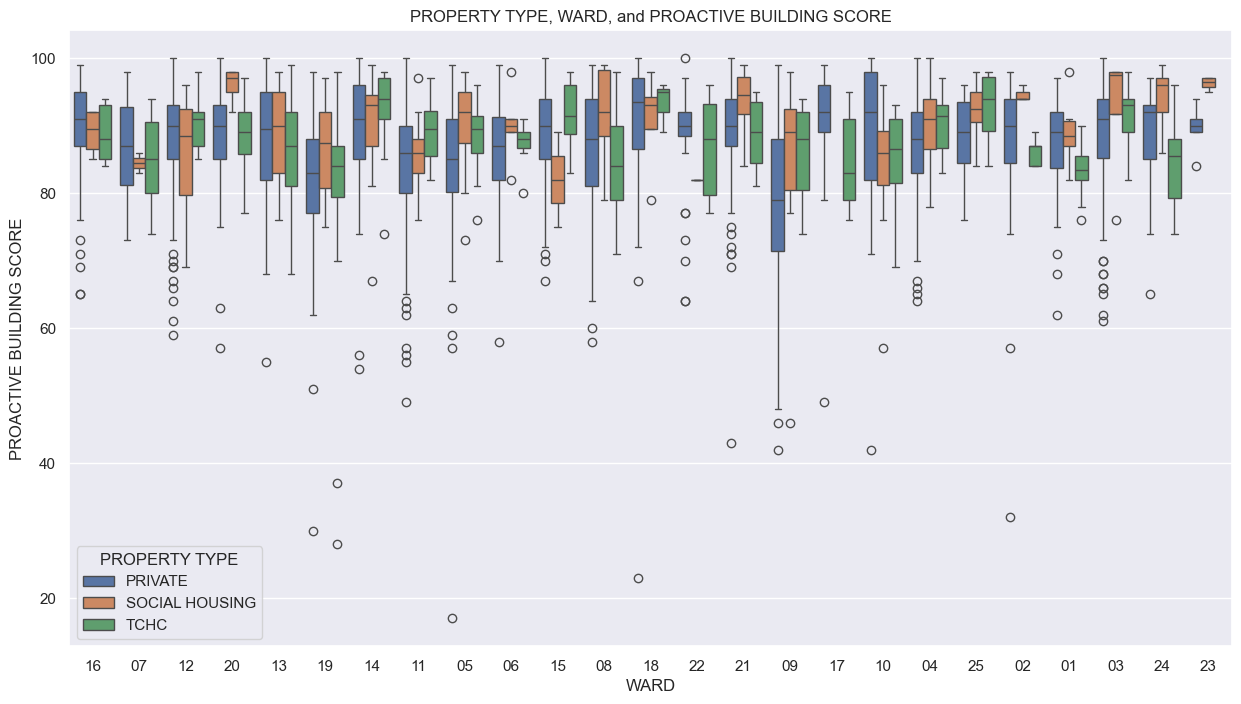

In [40]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_current, x = 'WARD', y = 'PROACTIVE BUILDING SCORE', hue = 'PROPERTY TYPE')
plt.title('PROPERTY TYPE, WARD, and PROACTIVE BUILDING SCORE')
plt.show()

LATITUDE, LONGITUDE, and CURRENT BUILDING EVAL SCORE

LATITUDE, LONGITUDE, and CURRENT BUILDING EVAL SCORE

In [41]:
fig = px.scatter_mapbox(df_current, 
                        lat = "LATITUDE", 
                        lon = "LONGITUDE", 
                        color = "CURRENT BUILDING EVAL SCORE",
                        size = "CURRENT BUILDING EVAL SCORE",
                        hover_name = "SITE ADDRESS",
                        hover_data = ["YEAR BUILT", "CONFIRMED UNITS"],
                        color_continuous_scale = px.colors.sequential.Viridis,
                        size_max = 15,
                        zoom = 10,
                        title = "Building Evaluation Scores Across Toronto")

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":50,"l":0,"b":0}, width = 1500, height = 800)

fig.show()

#### Analysing Data from 2017 to 2023

In [42]:

df_current = pd.read_csv("Apartment Building Evaluations 2023 - current.csv")

In [43]:
df_old = pd.read_csv("Pre-2023 Apartment Building Evaluations.csv")

In [44]:
df_old.shape

(11760, 40)

In [45]:
df_old.columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'RESULTS_OF_SCORE', 'NO_OF_AREAS_EVALUATED', 'ENTRANCE_LOBBY',
       'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'LAUNDRY_ROOMS',
       'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_CHUTE_ROOMS',
       'GARBAGE_BIN_STORAGE_AREA', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS',
       'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI',
       'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS',
       'BALCONY_GUARDS', 'WATER_PEN_EXT_BLDG_ELEMENTS', 'PARKING_AREA',
       'OTHER_FACILITIES', 'GRID', 'LATITUDE', 'LONGITUDE', 'X', 'Y'],
      dtype='object')

In [46]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          11760 non-null  int64  
 1   RSN                          11760 non-null  int64  
 2   YEAR_REGISTERED              11455 non-null  float64
 3   YEAR_EVALUATED               9751 non-null   float64
 4   YEAR_BUILT                   11714 non-null  float64
 5   PROPERTY_TYPE                11760 non-null  object 
 6   WARD                         11760 non-null  int64  
 7   WARDNAME                     11760 non-null  object 
 8   SITE_ADDRESS                 11760 non-null  object 
 9   CONFIRMED_STOREYS            11760 non-null  int64  
 10  CONFIRMED_UNITS              11760 non-null  int64  
 11  EVALUATION_COMPLETED_ON      11760 non-null  object 
 12  SCORE                        11760 non-null  int64  
 13  RESULTS_OF_SCORE

In [47]:
df_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   _id                             3572 non-null   int64  
 1   RSN                             3572 non-null   int64  
 2   YEAR REGISTERED                 3515 non-null   float64
 3   YEAR BUILT                      3555 non-null   float64
 4   YEAR EVALUATED                  3572 non-null   int64  
 5   PROPERTY TYPE                   3572 non-null   object 
 6   WARD                            3572 non-null   object 
 7   WARDNAME                        3571 non-null   object 
 8   SITE ADDRESS                    3572 non-null   object 
 9   CONFIRMED STOREYS               3572 non-null   int64  
 10  CONFIRMED UNITS                 3572 non-null   int64  
 11  EVALUATION COMPLETED ON         3572 non-null   object 
 12  CURRENT BUILDING EVAL SCORE     35

In [48]:
df_old.describe()

_id           RSN  YEAR_REGISTERED  YEAR_EVALUATED  \
count  11760.000000  1.176000e+04     11455.000000     9751.000000   
mean    5880.500000  4.171812e+06      2017.164033     2018.564968   
std     3394.963917  8.183299e+04         0.605889        1.467689   
min        1.000000  4.152554e+06      2017.000000     2017.000000   
25%     2940.750000  4.153701e+06      2017.000000     2017.000000   
50%     5880.500000  4.154620e+06      2017.000000     2018.000000   
75%     8820.250000  4.155548e+06      2017.000000     2020.000000   
max    11760.000000  5.207679e+06      2023.000000     2021.000000   

         YEAR_BUILT          WARD  CONFIRMED_STOREYS  CONFIRMED_UNITS  \
count  11714.000000  11760.000000       11760.000000     11760.000000   
mean    1961.077258     10.855357           7.629592        87.920408   
std       18.923485      6.332947           6.245635        95.349729   
min     1805.000000      1.000000           3.000000        10.000000   
25%     1955.000000      5.000000           3.000000        24.000000   
50%     1961.000000     11.000000           4.000000        48.000000   
75%     1970.000000     16.000000          10.000000       120.000000   
max     2022.000000     25.000000          51.000000       793.000000   

              SCORE  NO_OF_AREAS_EVALUATED  ENTRANCE_LOBBY  \
count  11760.000000           11760.000000    11758.000000   
mean      73.826956              17.141327        3.713642   
std       10.566185               1.691816        0.775948   
min        0.000000               0.000000        1.000000   
25%       66.000000              16.000000        3.000000   
50%       74.000000              17.000000        4.000000   
75%       81.000000              19.000000        4.000000   
max      100.000000              20.000000        5.000000   

       ENTRANCE_DOORS_WINDOWS      SECURITY    STAIRWELLS  LAUNDRY_ROOMS  \
count            11759.000000  11754.000000  11757.000000   11104.000000   
mean                 3.675313      4.126425      3.453857       3.575919   
std                  0.770057      0.877997      0.787374       0.794015   
min                  1.000000      1.000000      1.000000       1.000000   
25%                  3.000000      3.000000      3.000000       3.000000   
50%                  4.000000      4.000000      3.000000       4.000000   
75%                  4.000000      5.000000      4.000000       4.000000   
max                  5.000000      5.000000      5.000000       5.000000   

       INTERNAL_GUARDS_HANDRAILS  GARBAGE_CHUTE_ROOMS  \
count               11757.000000          5102.000000   
mean                    3.603640             3.567229   
std                     0.830116             0.840837   
min                     1.000000             1.000000   
25%                     3.000000             3.000000   
50%                     4.000000             4.000000   
75%                     4.000000             4.000000   
max                     5.000000             5.000000   

       GARBAGE_BIN_STORAGE_AREA    ELEVATORS  STORAGE_AREAS_LOCKERS  \
count              11749.000000  6897.000000            4773.000000   
mean                   3.607201     3.838336               3.621412   
std                    0.782764     0.808053               0.787966   
min                    1.000000     1.000000               1.000000   
25%                    3.000000     3.000000               3.000000   
50%                    4.000000     4.000000               4.000000   
75%                    4.000000     4.000000               4.000000   
max                    5.000000     5.000000               5.000000   

       INTERIOR_WALL_CEILING_FLOOR  INTERIOR_LIGHTING_LEVELS      GRAFFITI  \
count                 11758.000000              11758.000000  11721.000000   
mean                      3.492686                  3.672393      4.610869   
std                       0.767906                  0.878231      0.755874   
min              

In [49]:
df_current.describe()

_id           RSN  YEAR REGISTERED   YEAR BUILT  \
count  3572.000000  3.572000e+03      3515.000000  3555.000000   
mean   1786.500000  4.219479e+06      2017.447511  1962.168776   
std    1031.291908  2.380093e+05         1.406452    20.203152   
min       1.000000  4.152554e+06      2017.000000  1805.000000   
25%     893.750000  4.153728e+06      2017.000000  1955.000000   
50%    1786.500000  4.154690e+06      2017.000000  1962.000000   
75%    2679.250000  4.155706e+06      2017.000000  1970.000000   
max    3572.000000  5.415712e+06      2024.000000  2023.000000   

       YEAR EVALUATED  CONFIRMED STOREYS  CONFIRMED UNITS  \
count     3572.000000        3572.000000      3572.000000   
mean      2023.507839           7.775476        89.830627   
std          0.500009           6.491964        97.343198   
min       2023.000000           3.000000        10.000000   
25%       2023.000000           3.000000        23.000000   
50%       2024.000000           4.000000        50.000000   
75%       2024.000000          10.000000       125.000000   
max       2024.000000          51.000000       793.000000   

       CURRENT BUILDING EVAL SCORE  PROACTIVE BUILDING SCORE  \
count                  3572.000000               3572.000000   
mean                     87.149804                 87.314418   
std                       8.781738                  8.676950   
min                      17.000000                 17.000000   
25%                      83.000000                 83.000000   
50%                      89.000000                 89.000000   
75%                      93.000000                 93.000000   
max                     100.000000                100.000000   

       CURRENT REACTIVE SCORE  NO OF AREAS EVALUATED  NUMBERING OF PROPERTY  \
count             3572.000000            3572.000000            3572.000000   
mean                -0.164614              41.214726               2.877940   
std                  0.583351               3.675065               0.389149   
min                -14.000000              27.000000               0.000000   
25%                  0.000000              38.000000               3.000000   
50%                  0.000000              42.000000               3.000000   
75%                  0.000000              44.000000               3.000000   
max                  0.000000              49.000000               3.000000   

       EXTERIOR GROUNDS  RETAINING WALLS  CATCH BASINS / STORM DRAINAGE  \
count       3534.000000      1651.000000                    2801.000000   
mean           2.634975         2.549970                       2.876473   
std            0.585492         0.605344                       0.384178   
min            0.000000         0.000000                       0.000000   
25%            2.000000         2.000000                       3.000000   
50%            3.000000         3.000000                       3.000000   
75%            3.000000         3.000000                       3.000000   
max            3.000000         3.000000                       3.000000   

       BUILDING EXTERIOR  BALCONY GUARDS      WINDOWS  EXTERIOR WALKWAYS  \
count        3563.000000     2397.000000  3569.000000        3539.000000   
mean            2.173169        2.607426     2.561502           2.471037   
std             0.650693        0.607956     0.609333           0.637481   
min             0.000000        1.000000     1.000000           0.000000   
25%             2.000000        2.000000     2.000000           2.000000   
50%             2.000000        3.000000     3.000000           3.000000   
75%             3.000000        3.000000     3.000000           3.000000   
max             3.000000        3.000000     3.000000           3.000000   

       CLOTHING DROP BOXES  ACCESSORY BUILDINGS     INTERCOM  \
count           296.000000           505.000000  3515.000000   
mean              2.489865             2.625743     2.908108   
std               0.683881  

In [50]:
df_current.columns = df_current.columns.str.replace(" ", "_")


In [51]:
df_old['RESULTS_OF_SCORE'].unique()

array(['Evaluation needs to be conducted in 3 years',
       'Evaluation needs to be conducted in 2 years',
       'Evaluation needs to be conducted in 1 year', 'Building Audit'],
      dtype=object)

In [52]:
print(f"Evaluation needs to be conducted in 1 year min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 1 year'].min()}")
print(f"Evaluation needs to be conducted in 1 year max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 1 year'].max()}")
print(f"Evaluation needs to be conducted in 2 years min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 2 years'].min()}")
print(f"Evaluation needs to be conducted in 2 years max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 2 years'].max()}")
print(f"Evaluation needs to be conducted in 3 years min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 3 years'].min()}")
print(f"Evaluation needs to be conducted in 3 years max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Evaluation needs to be conducted in 3 years'].max()}")
print(f"Building Audit min {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Building Audit'].min()}")
print(f"Building Audit max {df_old['SCORE'][df_old['RESULTS_OF_SCORE'] =='Building Audit'].max()}")

Evaluation needs to be conducted in 1 year min 51
Evaluation needs to be conducted in 1 year max 65
Evaluation needs to be conducted in 2 years min 66
Evaluation needs to be conducted in 2 years max 85
Evaluation needs to be conducted in 3 years min 86
Evaluation needs to be conducted in 3 years max 100
Building Audit min 0
Building Audit max 50


In [54]:
df_old.columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'RESULTS_OF_SCORE', 'NO_OF_AREAS_EVALUATED', 'ENTRANCE_LOBBY',
       'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'LAUNDRY_ROOMS',
       'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_CHUTE_ROOMS',
       'GARBAGE_BIN_STORAGE_AREA', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS',
       'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI',
       'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS',
       'BALCONY_GUARDS', 'WATER_PEN_EXT_BLDG_ELEMENTS', 'PARKING_AREA',
       'OTHER_FACILITIES', 'GRID', 'LATITUDE', 'LONGITUDE', 'X', 'Y'],
      dtype='object')

In [55]:
df_current.columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_BUILT', 'YEAR_EVALUATED',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'CURRENT_BUILDING_EVAL_SCORE', 'PROACTIVE_BUILDING_SCORE',
       'CURRENT_REACTIVE_SCORE', 'NO_OF_AREAS_EVALUATED',
       'NUMBERING_OF_PROPERTY', 'EXTERIOR_GROUNDS', 'FENCING',
       'RETAINING_WALLS', 'CATCH_BASINS_/_STORM_DRAINAGE', 'BUILDING_EXTERIOR',
       'BALCONY_GUARDS', 'WINDOWS', 'EXT._RECEPTACLE_STORAGE_AREA',
       'EXTERIOR_WALKWAYS', 'CLOTHING_DROP_BOXES', 'ACCESSORY_BUILDINGS',
       'INTERCOM', 'EMERGENCY_CONTACT_SIGN', 'LOBBY_-_WALLS_AND_CEILING',
       'LOBBY_FLOORS', 'LAUNDRY_ROOM', 'INT._RECEPTACLE_STORAGE_AREA',
       'MAIL_RECEPTACLES', 'EXTERIOR_DOORS', 'STORAGE_AREAS/LOCKERS_MAINT.',
       'POOLS', 'OTHER_AMENITIES', 'PARKING_AREAS',
       'ABANDONED_EQUIP./DERELICT_VEH.', 'GARBAGE/COMPACTOR_ROOM',
       'ELEVATOR_MAINTENANCE', 'ELEVATOR_COS

In [56]:
common_columns = df_old.columns.intersection(df_current.columns)
common_columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'NO_OF_AREAS_EVALUATED', 'GRAFFITI', 'EXTERIOR_GROUNDS',
       'EXTERIOR_WALKWAYS', 'BALCONY_GUARDS', 'GRID', 'LATITUDE', 'LONGITUDE',
       'X', 'Y'],
      dtype='object')

In [57]:
# Get all column names from both DataFrames
all_columns = set(df_old.columns).union(set(df_current.columns))

# Get common column names
common_columns = set(df_old.columns).intersection(set(df_current.columns))

# Get column names that are not common
not_common_columns = all_columns - common_columns

In [58]:
not_common_columns

{'ABANDONED_EQUIP./DERELICT_VEH.',
 'ACCESSORY_BUILDINGS',
 'BUILDING_CLEANLINESS',
 'BUILDING_EXTERIOR',
 'CATCH_BASINS_/_STORM_DRAINAGE',
 'CHUTE_ROOMS_-_MAINTENANCE',
 'CLEANING_LOG',
 'CLOTHING_DROP_BOXES',
 'COMMON_AREA_PESTS',
 'COMMON_AREA_VENTILATION',
 'CURRENT_BUILDING_EVAL_SCORE',
 'CURRENT_REACTIVE_SCORE',
 'ELECTRICAL_SAFETY_PLAN',
 'ELECTRICAL_SERVICES_/_OUTLETS',
 'ELEVATORS',
 'ELEVATOR_COSMETICS',
 'ELEVATOR_MAINTENANCE',
 'EMERGENCY_CONTACT_SIGN',
 'ENTRANCE_DOORS_WINDOWS',
 'ENTRANCE_LOBBY',
 'EXT._RECEPTACLE_STORAGE_AREA',
 'EXTERIOR_CLADDING',
 'EXTERIOR_DOORS',
 'FENCING',
 'GARBAGE/COMPACTOR_ROOM',
 'GARBAGE_BIN_STORAGE_AREA',
 'GARBAGE_CHUTE_ROOMS',
 'INT._HALLWAY_-_WALLS_/_CEILING',
 'INT._HANDRAIL_/_GUARD_-_MAINT.',
 'INT._HANDRAIL_/_GUARD_-_SAFETY',
 'INT._LOBBY_/_HALLWAY_LIGHTING',
 'INT._RECEPTACLE_STORAGE_AREA',
 'INTERCOM',
 'INTERIOR_HALLWAY_FLOORS',
 'INTERIOR_LIGHTING_LEVELS',
 'INTERIOR_WALL_CEILING_FLOOR',
 'INTERNAL_GUARDS_HANDRAILS',
 'LAUNDRY_ROOM

In [59]:
# Get column names that are in df_old but not in df_current
columns_only_in_df_old = set(df_old.columns) - set(df_current.columns)

# Display the result
columns_only_in_df_old

{'ELEVATORS',
 'ENTRANCE_DOORS_WINDOWS',
 'ENTRANCE_LOBBY',
 'EXTERIOR_CLADDING',
 'GARBAGE_BIN_STORAGE_AREA',
 'GARBAGE_CHUTE_ROOMS',
 'INTERIOR_LIGHTING_LEVELS',
 'INTERIOR_WALL_CEILING_FLOOR',
 'INTERNAL_GUARDS_HANDRAILS',
 'LAUNDRY_ROOMS',
 'OTHER_FACILITIES',
 'PARKING_AREA',
 'RESULTS_OF_SCORE',
 'SCORE',
 'SECURITY',
 'STAIRWELLS',
 'STORAGE_AREAS_LOCKERS',
 'WATER_PEN_EXT_BLDG_ELEMENTS'}

In [60]:
# Get column names that are in df_old but not in df_current
columns_only_in_df_current = set(df_current.columns) - set(df_old.columns)

# Display the result
columns_only_in_df_current

{'ABANDONED_EQUIP./DERELICT_VEH.',
 'ACCESSORY_BUILDINGS',
 'BUILDING_CLEANLINESS',
 'BUILDING_EXTERIOR',
 'CATCH_BASINS_/_STORM_DRAINAGE',
 'CHUTE_ROOMS_-_MAINTENANCE',
 'CLEANING_LOG',
 'CLOTHING_DROP_BOXES',
 'COMMON_AREA_PESTS',
 'COMMON_AREA_VENTILATION',
 'CURRENT_BUILDING_EVAL_SCORE',
 'CURRENT_REACTIVE_SCORE',
 'ELECTRICAL_SAFETY_PLAN',
 'ELECTRICAL_SERVICES_/_OUTLETS',
 'ELEVATOR_COSMETICS',
 'ELEVATOR_MAINTENANCE',
 'EMERGENCY_CONTACT_SIGN',
 'EXT._RECEPTACLE_STORAGE_AREA',
 'EXTERIOR_DOORS',
 'FENCING',
 'GARBAGE/COMPACTOR_ROOM',
 'INT._HALLWAY_-_WALLS_/_CEILING',
 'INT._HANDRAIL_/_GUARD_-_MAINT.',
 'INT._HANDRAIL_/_GUARD_-_SAFETY',
 'INT._LOBBY_/_HALLWAY_LIGHTING',
 'INT._RECEPTACLE_STORAGE_AREA',
 'INTERCOM',
 'INTERIOR_HALLWAY_FLOORS',
 'LAUNDRY_ROOM',
 'LOBBY_-_WALLS_AND_CEILING',
 'LOBBY_FLOORS',
 'MAIL_RECEPTACLES',
 'MAINTENANCE_LOG',
 'NUMBERING_OF_PROPERTY',
 'OTHER_AMENITIES',
 'PARKING_AREAS',
 'PEST_CONTROL_LOG',
 'POOLS',
 'PROACTIVE_BUILDING_SCORE',
 'RETAINING

In [61]:
# Rename the column CURRENT_BUILDING_EVAL_SCORE to SCORE
df_current.rename(columns={"CURRENT_BUILDING_EVAL_SCORE": "SCORE"}, inplace=True)


In [62]:
# Create the RESULTS_OF_SCORE column based on the conditions
df_current['RESULTS_OF_SCORE'] = df_current['SCORE'].apply(
    lambda x: 'Building Audit' if x < 50 else
              'Evaluation needs to be conducted in 1 year' if x < 66 else
              'Evaluation needs to be conducted in 2 years' if x < 85 else
              'Evaluation needs to be conducted in 3 years'
)



In [63]:
df_current['SCORE'][df_current['RESULTS_OF_SCORE'] == 'Evaluation needs to be conducted in 3 years'].count()

np.int64(2461)

In [64]:
df_old['ENTRANCE_LOBBY'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [65]:
df_current['LOBBY_-_WALLS_AND_CEILING'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [66]:
df_current['LOBBY_FLOORS'].unique()

array(['3', '2', '1', nan, '0', ' 1', ' N/A'], dtype=object)

In [67]:
import numpy as np

# Clean the 'LOBBY_FLOORS' column to handle strings and invalid entries
df_current['LOBBY_FLOORS'] = pd.to_numeric(df_current['LOBBY_FLOORS'].str.strip(), errors='coerce')

# Replace invalid or missing values with NaN
df_current['LOBBY_FLOORS'] = df_current['LOBBY_FLOORS'].replace([-1, 0], np.nan)

# Aggregate the two columns
df_current['ENTRANCE_LOBBY_RAW'] = df_current['LOBBY_-_WALLS_AND_CEILING'] + df_current['LOBBY_FLOORS']

# Map the aggregated values to the desired range
def map_to_scale(value):
    if value >= 5:
        return 5.0
    elif value == 4:
        return 4.0
    elif value == 3:
        return 3.0
    elif value == 2:
        return 2.0
    elif value == 1:
        return 1.0
    else:
        return np.nan

df_current['ENTRANCE_LOBBY'] = df_current['ENTRANCE_LOBBY_RAW'].apply(map_to_scale)

# Drop the intermediate raw column if no longer needed
df_current.drop(columns=['ENTRANCE_LOBBY_RAW'], inplace=True)

# Verify the results
print(df_current['ENTRANCE_LOBBY'].unique())


[ 5.  4.  3. nan  2.]


In [68]:
df_current['ENTRANCE_LOBBY'].value_counts()

ENTRANCE_LOBBY
5.0    2816
4.0     572
3.0      95
2.0      54
Name: count, dtype: int64

In [69]:
df_current['ENTRANCE_LOBBY'].isnull().sum()

np.int64(35)

In [70]:
df_current['ELEVATOR_COSMETICS'].unique()

array(['2', '3', nan, '1', '0', ' N/A'], dtype=object)

In [71]:
df_current['ELEVATOR_MAINTENANCE'].unique()

array(['3', nan, '1', '2', '0', ' 3', ' N/A'], dtype=object)

In [72]:
df_old['ELEVATORS'].unique()

array([ 5., nan,  4.,  3.,  2.,  1.])

In [73]:
import numpy as np

# Clean and normalize 'ELEVATOR_COSMETICS'
df_current['ELEVATOR_COSMETICS'] = pd.to_numeric(
    df_current['ELEVATOR_COSMETICS'].str.strip(), errors='coerce'
)

# Clean and normalize 'ELEVATOR_MAINTENANCE'
df_current['ELEVATOR_MAINTENANCE'] = pd.to_numeric(
    df_current['ELEVATOR_MAINTENANCE'].str.strip(), errors='coerce'
)

# Replace invalid or missing values (e.g., -1 or N/A) with NaN
df_current['ELEVATOR_COSMETICS'] = df_current['ELEVATOR_COSMETICS'].replace([-1], np.nan)
df_current['ELEVATOR_MAINTENANCE'] = df_current['ELEVATOR_MAINTENANCE'].replace([-1], np.nan)

# Aggregate the two columns to create the 'ELEVATORS' column
df_current['ELEVATORS'] = df_current['ELEVATOR_COSMETICS'] + df_current['ELEVATOR_MAINTENANCE']

# Optional: Map the aggregated values to a desired range (if needed)
# Example mapping function
def map_to_scale(value):
    if value >= 5:
        return 5.0
    elif value == 4:
        return 4.0
    elif value == 3:
        return 3.0
    elif value == 2:
        return 2.0
    elif value == 1:
        return 1.0
    else:
        return np.nan

df_current['ELEVATORS'] = df_current['ELEVATORS'].apply(map_to_scale)

# Verify the results
print(df_current['ELEVATORS'].unique())


[ 5. nan  4.  2.  3.]


In [74]:
df_old['ENTRANCE_DOORS_WINDOWS'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [75]:
df_current['WINDOWS'].unique()

array([ 3.,  2.,  1., nan])

In [76]:
df_current['EXTERIOR_DOORS'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [77]:
import numpy as np

# Clean and normalize 'WINDOWS' column (convert string numbers to numeric and handle invalid values)
df_current['WINDOWS'] = pd.to_numeric(df_current['WINDOWS'], errors='coerce')

# Clean and normalize 'EXTERIOR_DOORS' column (convert string numbers to numeric and handle invalid values)
df_current['EXTERIOR_DOORS'] = pd.to_numeric(df_current['EXTERIOR_DOORS'], errors='coerce')

# Replace invalid values (e.g., -1 or 0) with NaN
df_current['WINDOWS'] = df_current['WINDOWS'].replace([-1], np.nan)
df_current['EXTERIOR_DOORS'] = df_current['EXTERIOR_DOORS'].replace([-1, 0], np.nan)

# Aggregate the two columns to create the 'ENTRANCE_DOORS_WINDOWS' column
df_current['ENTRANCE_DOORS_WINDOWS'] = df_current['WINDOWS'] + df_current['EXTERIOR_DOORS']

# Optional: Map the aggregated values to the range [5., 4., 3., 2., 1., nan] as per df_old
def map_to_entrance_doors(value):
    if value >= 5:
        return 5.0
    elif value == 4:
        return 4.0
    elif value == 3:
        return 3.0
    elif value == 2:
        return 2.0
    elif value == 1:
        return 1.0
    else:
        return np.nan

# Apply the mapping function
df_current['ENTRANCE_DOORS_WINDOWS'] = df_current['ENTRANCE_DOORS_WINDOWS'].apply(map_to_entrance_doors)

# Verify the results
print(df_current['ENTRANCE_DOORS_WINDOWS'].unique())


[ 5.  4.  3.  2. nan]


In [78]:
df_current['ENTRANCE_DOORS_WINDOWS'].value_counts()

ENTRANCE_DOORS_WINDOWS
5.0    2853
4.0     563
3.0     130
2.0      19
Name: count, dtype: int64

In [79]:
df_current['ENTRANCE_DOORS_WINDOWS'].isnull().sum()

np.int64(7)

In [80]:
df_old['SECURITY'].unique()

array([ 5.,  4.,  3.,  2., nan,  1.])

In [81]:
df_current.columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_BUILT', 'YEAR_EVALUATED',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'PROACTIVE_BUILDING_SCORE', 'CURRENT_REACTIVE_SCORE',
       'NO_OF_AREAS_EVALUATED', 'NUMBERING_OF_PROPERTY', 'EXTERIOR_GROUNDS',
       'FENCING', 'RETAINING_WALLS', 'CATCH_BASINS_/_STORM_DRAINAGE',
       'BUILDING_EXTERIOR', 'BALCONY_GUARDS', 'WINDOWS',
       'EXT._RECEPTACLE_STORAGE_AREA', 'EXTERIOR_WALKWAYS',
       'CLOTHING_DROP_BOXES', 'ACCESSORY_BUILDINGS', 'INTERCOM',
       'EMERGENCY_CONTACT_SIGN', 'LOBBY_-_WALLS_AND_CEILING', 'LOBBY_FLOORS',
       'LAUNDRY_ROOM', 'INT._RECEPTACLE_STORAGE_AREA', 'MAIL_RECEPTACLES',
       'EXTERIOR_DOORS', 'STORAGE_AREAS/LOCKERS_MAINT.', 'POOLS',
       'OTHER_AMENITIES', 'PARKING_AREAS', 'ABANDONED_EQUIP./DERELICT_VEH.',
       'GARBAGE/COMPACTOR_ROOM', 'ELEVATOR_MAINTENANCE', 'ELEVATOR_COSMETICS',
       'INT._HALLWAY

In [82]:
df_old.columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'RESULTS_OF_SCORE', 'NO_OF_AREAS_EVALUATED', 'ENTRANCE_LOBBY',
       'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'LAUNDRY_ROOMS',
       'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_CHUTE_ROOMS',
       'GARBAGE_BIN_STORAGE_AREA', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS',
       'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI',
       'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS',
       'BALCONY_GUARDS', 'WATER_PEN_EXT_BLDG_ELEMENTS', 'PARKING_AREA',
       'OTHER_FACILITIES', 'GRID', 'LATITUDE', 'LONGITUDE', 'X', 'Y'],
      dtype='object')

In [83]:
# Get the common columns between df_old and df_current
common_columns = df_old.columns.intersection(df_current.columns)

# Get the columns in df_old but not in the common columns
columns_only_in_df_old = set(df_old.columns) - set(common_columns)

# Display the result
print(columns_only_in_df_old)
print(common_columns)


{'STAIRWELLS', 'INTERIOR_WALL_CEILING_FLOOR', 'EXTERIOR_CLADDING', 'WATER_PEN_EXT_BLDG_ELEMENTS', 'GARBAGE_CHUTE_ROOMS', 'OTHER_FACILITIES', 'GARBAGE_BIN_STORAGE_AREA', 'INTERIOR_LIGHTING_LEVELS', 'LAUNDRY_ROOMS', 'PARKING_AREA', 'SECURITY', 'STORAGE_AREAS_LOCKERS', 'INTERNAL_GUARDS_HANDRAILS'}
Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'RESULTS_OF_SCORE', 'NO_OF_AREAS_EVALUATED', 'ENTRANCE_LOBBY',
       'ENTRANCE_DOORS_WINDOWS', 'ELEVATORS', 'GRAFFITI', 'EXTERIOR_GROUNDS',
       'EXTERIOR_WALKWAYS', 'BALCONY_GUARDS', 'GRID', 'LATITUDE', 'LONGITUDE',
       'X', 'Y'],
      dtype='object')


In [84]:
columns_only_in_df_old

{'EXTERIOR_CLADDING',
 'GARBAGE_BIN_STORAGE_AREA',
 'GARBAGE_CHUTE_ROOMS',
 'INTERIOR_LIGHTING_LEVELS',
 'INTERIOR_WALL_CEILING_FLOOR',
 'INTERNAL_GUARDS_HANDRAILS',
 'LAUNDRY_ROOMS',
 'OTHER_FACILITIES',
 'PARKING_AREA',
 'SECURITY',
 'STAIRWELLS',
 'STORAGE_AREAS_LOCKERS',
 'WATER_PEN_EXT_BLDG_ELEMENTS'}

In [85]:
df_old['LAUNDRY_ROOMS'].unique()

array([ 5., nan,  2.,  4.,  3.,  1.])

In [86]:
df_current['LAUNDRY_ROOM'].unique()

array(['3', '2', nan, '0', '1', ' 2', ' N/A'], dtype=object)

In [87]:
import numpy as np
import pandas as pd
import random
# Clean 'LAUNDRY_ROOM' values (convert to numeric and replace invalid ones)
df_current['LAUNDRY_ROOM'] = pd.to_numeric(df_current['LAUNDRY_ROOM'], errors='coerce')

# Replace invalid values such as -1 and NaN with NaN (since they don't exist in df_old)
df_current['LAUNDRY_ROOM'] = df_current['LAUNDRY_ROOM'].replace([-1, 0], np.nan)

# Map old scale to new scale: 1 -> 1, 2 -> 3, 3 -> 5
def scale_laundry(value):
    if value == 1:
        return random.choice([1, 2]) 
    elif value == 2:
        return random.choice([3, 4]) 
    elif value == 3:
        return 5.0
    else:
        return np.nan  # For invalid values, return NaN

# Apply the scaling function to create a new column 'LAUNDRY_ROOMS'
df_current['LAUNDRY_ROOMS'] = df_current['LAUNDRY_ROOM'].apply(scale_laundry)

# Verify the new column
print(df_current['LAUNDRY_ROOMS'].unique())


[ 5.  3. nan  4.  2.  1.]


In [88]:
df_old['EXTERIOR_CLADDING'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [89]:
df_current['BUILDING_EXTERIOR'].unique()

array([ 3.,  2., nan,  1.,  0.])

In [90]:
import numpy as np
import random

# Clean the 'BUILDING_EXTERIOR' values by converting to numeric (if necessary)
df_current['BUILDING_EXTERIOR'] = pd.to_numeric(df_current['BUILDING_EXTERIOR'], errors='coerce')

# Mapping function to standardize the values as per the given rules
def scale_exterior(value):
    if value == 3:
        return 5  # Highest value
    elif value == 2:
        return random.choice([3, 4])  # Randomly pick between 3 or 4
    elif value == 1:
        return random.choice([1, 2])  # Randomly pick between 1 or 2
    elif value == 0 or np.isnan(value):
        return np.nan  # Null for 0 or NaN values
    else:
        return np.nan  # For any other invalid values

# Create the 'EXTERIOR_CLADDING' column in df_current by applying the scale function
df_current['EXTERIOR_CLADDING'] = df_current['BUILDING_EXTERIOR'].apply(scale_exterior)

# Check the result to verify the new column
print(df_current['EXTERIOR_CLADDING'].unique())


[ 5.  4.  3. nan  1.  2.]


In [91]:
df_old['GARBAGE_BIN_STORAGE_AREA'].unique()

array([ 5.,  4., nan,  3.,  2.,  1.])

In [92]:
df_current['GARBAGE/COMPACTOR_ROOM'].unique()

array(['3', '2', nan, '1', '0', ' 3', ' N/A', ' 1'], dtype=object)

In [93]:
df_current['EXT._RECEPTACLE_STORAGE_AREA'].unique()

array(['3', nan, '2', '1', ' 1', ' 2', '0', ' N/A'], dtype=object)

In [94]:
df_current['INT._RECEPTACLE_STORAGE_AREA'].unique()

array([nan, '2', '3', '0', '1', ' 2', ' 3', ' N/A'], dtype=object)

In [95]:
import numpy as np
import random
import pandas as pd

# Clean the columns by converting to numeric values, where needed
df_current['GARBAGE/COMPACTOR_ROOM'] = pd.to_numeric(df_current['GARBAGE/COMPACTOR_ROOM'], errors='coerce')
df_current['EXT._RECEPTACLE_STORAGE_AREA'] = pd.to_numeric(df_current['EXT._RECEPTACLE_STORAGE_AREA'], errors='coerce')
df_current['INT._RECEPTACLE_STORAGE_AREA'] = pd.to_numeric(df_current['INT._RECEPTACLE_STORAGE_AREA'], errors='coerce')

# Normalize the values to the range [1, 2, 3, 4, 5]
def normalize_garbage(value):
    if value == 3:
        return 5  # Highest value
    elif value == 2:
        return random.choice([3, 4])  # Randomly pick between 3 or 4
    elif value == 1:
        return random.choice([1, 2])  # Randomly pick between 1 or 2
    elif value == 0 or value == -1 or np.isnan(value):
        return np.nan  # Null for 0, -1, or NaN values
    else:
        return np.nan  # For any other invalid values

# Apply the normalization function to each of the relevant columns
normalized_values = df_current[['GARBAGE/COMPACTOR_ROOM', 'EXT._RECEPTACLE_STORAGE_AREA', 'INT._RECEPTACLE_STORAGE_AREA']].applymap(normalize_garbage)

# Sum the normalized values
sum_values = normalized_values.sum(axis=1)

# Map the sum to the range [1, 5]
def scale_to_range(sum_value):
    if np.isnan(sum_value):
        return np.nan  # If the value is NaN, return NaN
    # Map the sum from the range [0, 9] to [1, 5]
    return max(1, min(5, ((sum_value / 9) * 4) + 1))  # Scaling formula

# Apply the scaling function
df_current['GARBAGE_BIN_STORAGE_AREA'] = sum_values.apply(scale_to_range)
df_current['GARBAGE_BIN_STORAGE_AREA'] = df_current['GARBAGE_BIN_STORAGE_AREA'].astype('int')
# Check the result
print(df_current['GARBAGE_BIN_STORAGE_AREA'].unique())


[5 2 3 4 1]


In [96]:
df_current['CHUTE_ROOMS_-_MAINTENANCE'].unique()

array([ 2.,  3., nan,  1.,  0.])

In [97]:
df_old['GARBAGE_CHUTE_ROOMS'].unique()

array([ 5., nan,  4.,  3.,  2.,  1.])

In [98]:
import numpy as np
import pandas as pd



# Clean the df_current column by converting to numeric values, where needed
df_current['CHUTE_ROOMS_-_MAINTENANCE'] = pd.to_numeric(df_current['CHUTE_ROOMS_-_MAINTENANCE'], errors='coerce')

# Define a function to map values based on the logic above
def map_chute_rooms(value):
    if value == 2:
        return np.random.choice([2, 3])  # Map 2 to 2 or 3 randomly
    elif value == 3:
        return np.random.choice([4, 5])  # Map 3 to 4 or 5 randomly
    elif value == 1:
        return 1  # Map 1 directly to 1
    elif value == 0 or value == -1 or np.isnan(value):
        return np.nan  # Map 0, -1, and NaN to NaN
    else:
        return np.nan  # For any other unexpected value, return NaN

# Apply the mapping function to create the new column
df_current['GARBAGE_CHUTE_ROOMS'] = df_current['CHUTE_ROOMS_-_MAINTENANCE'].apply(map_chute_rooms)

# Check the result
print(df_current['GARBAGE_CHUTE_ROOMS'].unique())


[ 2.  4.  5. nan  3.  1.]


In [99]:
df_old['INTERIOR_LIGHTING_LEVELS'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [100]:
df_current['INT._LOBBY_/_HALLWAY_LIGHTING'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [101]:
df_current['STAIRWELL_LIGHTING'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [102]:
df_current.describe()

_id           RSN  YEAR_REGISTERED   YEAR_BUILT  \
count  3572.000000  3.572000e+03      3515.000000  3555.000000   
mean   1786.500000  4.219479e+06      2017.447511  1962.168776   
std    1031.291908  2.380093e+05         1.406452    20.203152   
min       1.000000  4.152554e+06      2017.000000  1805.000000   
25%     893.750000  4.153728e+06      2017.000000  1955.000000   
50%    1786.500000  4.154690e+06      2017.000000  1962.000000   
75%    2679.250000  4.155706e+06      2017.000000  1970.000000   
max    3572.000000  5.415712e+06      2024.000000  2023.000000   

       YEAR_EVALUATED  CONFIRMED_STOREYS  CONFIRMED_UNITS        SCORE  \
count     3572.000000        3572.000000      3572.000000  3572.000000   
mean      2023.507839           7.775476        89.830627    87.149804   
std          0.500009           6.491964        97.343198     8.781738   
min       2023.000000           3.000000        10.000000    17.000000   
25%       2023.000000           3.000000        23.000000    83.000000   
50%       2024.000000           4.000000        50.000000    89.000000   
75%       2024.000000          10.000000       125.000000    93.000000   
max       2024.000000          51.000000       793.000000   100.000000   

       PROACTIVE_BUILDING_SCORE  CURRENT_REACTIVE_SCORE  \
count               3572.000000             3572.000000   
mean                  87.314418               -0.164614   
std                    8.676950                0.583351   
min                   17.000000              -14.000000   
25%                   83.000000                0.000000   
50%                   89.000000                0.000000   
75%                   93.000000                0.000000   
max                  100.000000                0.000000   

       NO_OF_AREAS_EVALUATED  NUMBERING_OF_PROPERTY  EXTERIOR_GROUNDS  \
count            3572.000000            3572.000000       3534.000000   
mean               41.214726               2.877940          2.634975   
std                 3.675065               0.389149          0.585492   
min                27.000000               0.000000          0.000000   
25%                38.000000               3.000000          2.000000   
50%                42.000000               3.000000          3.000000   
75%                44.000000               3.000000          3.000000   
max                49.000000               3.000000          3.000000   

       RETAINING_WALLS  CATCH_BASINS_/_STORM_DRAINAGE  BUILDING_EXTERIOR  \
count      1651.000000                    2801.000000        3563.000000   
mean          2.549970                       2.876473           2.173169   
std           0.605344                       0.384178           0.650693   
min           0.000000                       0.000000           0.000000   
25%           2.000000                       3.000000           2.000000   
50%           3.000000                       3.000000           2.000000   
75%           3.000000                       3.000000           3.000000   
max           3.000000                       3.000000           3.000000   

       BALCONY_GUARDS      WINDOWS  EXT._RECEPTACLE_STORAGE_AREA  \
count     2397.000000  3569.000000                   3240.000000   
mean         2.607426     2.561502                      2.500926   
std          0.607956     0.609333                      0.631087   
min          1.000000     1.000000                      0.000000   
25%          2.000000     2.000000                      2.000000   
50%          3.000000     3.000000                      3.000000   
75%          3.000000     3.000000                      3.000000   
max          3.000000     3.000000                      3.000000   

       EXTERIOR_WALKWAYS  CLOTHING_DROP_BOXES  ACCESSORY_BUILDINGS  \
count        3539.000000           296.000000           505.000000   
mean            2.471037             2.489865             2.625743   
std             0.637481             0.683881          

In [103]:
df_current['INT._LOBBY_/_HALLWAY_LIGHTING'].unique()

array([ 3.,  2.,  1., nan,  0.])

In [104]:
import numpy as np
import random
import pandas as pd



# Define the normalization function for lighting levels
def normalize_light(value):
    if value > 5:
        return 5  # Highest value
    elif value > 4:
        return 4  # Randomly pick between 3 or 4
    elif value > 3:
        return 3  # Randomly pick between 1 or 2
    elif value > 2:
        return 2  # Map 0 to 0
    elif value > 1:
        return  1 # Map 0 to 0
    elif value == 0:
        return  0 # Map 0 to 0
    else:
        return np.nan  # For any other invalid values

# Apply the normalization function to each of the relevant columns
df_current['INTERIOR_LIGHTING_LEVELS'] = df_current[['INT._LOBBY_/_HALLWAY_LIGHTING', 'STAIRWELL_LIGHTING']].applymap(normalize_light).sum(axis=1)

df_current['INTERIOR_LIGHTING_LEVELS'] = df_current['INTERIOR_LIGHTING_LEVELS'].astype('int')
# # Handle NaN values by replacing them with a placeholder (e.g., -1 or NaN)
# df_current['INTERIOR_LIGHTING_LEVELS'].fillna(np.nan, inplace=True)

# Check the result
df_current['INTERIOR_LIGHTING_LEVELS'].unique()


array([4, 3, 2, 0, 1])

In [105]:
df_old['INTERIOR_WALL_CEILING_FLOOR'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [106]:
df_current['INTERIOR_HALLWAY_FLOORS'].unique()

array([ 2.,  3.,  1., nan,  0.])

In [107]:
df_old['INTERIOR_WALL_CEILING_FLOOR'].unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [108]:
import numpy as np
import random
import pandas as pd

# Define the normalization function for lighting levels
def normalize_light(value):
    if value > 5:
        return 5  # Highest value
    elif value > 4:
        return 4  # Second highest value
    elif value > 3:
        return 3  # Middle value
    elif value > 2:
        return 2  # Second lowest value
    elif value > 1:
        return 1  # Lowest non-zero value
    elif value == 0:
        return 0  # Map 0 to 0
    else:
        return np.nan  # For any other invalid values

# Apply the normalization function to the relevant columns in df_current
df_current['INTERIOR_WALL_CEILING_FLOOR'] = df_current[['INTERIOR_HALLWAY_FLOORS', 'INT._HALLWAY_-_WALLS_/_CEILING']].applymap(normalize_light).sum(axis=1)
df_current['INTERIOR_WALL_CEILING_FLOOR'] = df_current['INTERIOR_WALL_CEILING_FLOOR'].astype('int')


# Check the results
print(df_current['INTERIOR_WALL_CEILING_FLOOR'].unique())



[2 4 3 1 0]


In [109]:
df_old['INTERNAL_GUARDS_HANDRAILS'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [110]:
df_current['INT._HANDRAIL_/_GUARD_-_SAFETY'].unique()

array([ 1.,  3.,  2.,  0., nan])

In [111]:
df_current['INT._HANDRAIL_/_GUARD_-_MAINT.'].unique()

array([ 2.,  3.,  1.,  0., nan])

In [112]:
import numpy as np
import random
import pandas as pd

# Define the normalization function for guards and handrails
def normalize_guards(value):
    if value > 5:
        return 5  # Highest value
    elif value > 4:
        return 4  # Second highest value
    elif value > 3:
        return 3  # Middle value
    elif value > 2:
        return 2  # Second lowest value
    elif value > 1:
        return 1  # Lowest non-zero value
    elif value == 0:
        return 0  # Map 0 to 0
    else:
        return np.nan  # For any other invalid values

# Apply the normalization function to the relevant columns in df_current
df_current['INTERNAL_GUARDS_HANDRAILS'] = df_current[['INT._HANDRAIL_/_GUARD_-_SAFETY', 'INT._HANDRAIL_/_GUARD_-_MAINT.']].applymap(normalize_guards).sum(axis=1)
df_current['INTERNAL_GUARDS_HANDRAILS'] = df_current['INTERNAL_GUARDS_HANDRAILS'].astype('int')

# Check the results
print(df_current['INTERNAL_GUARDS_HANDRAILS'].unique())


[1 3 4 2 0]


In [113]:
df_old['PARKING_AREA'].unique()

array([ 5.,  3., nan,  4.,  2.,  1.])

In [114]:
df_current['PARKING_AREAS'].unique()

array([nan,  1.,  2.,  3.,  0.])

In [115]:
import numpy as np
import pandas as pd
import random

# Define the normalization function for parking areas
def normalize_parking(value):
    if value == 3:
        return 5  # Highest value
    elif value == 2:
        return random.choice([3, 4])  # Second highest value
    elif value == 1:
        return random.choice([1, 2])  # Middle value
    elif value == 0:
        return 0  # Second lowest value
    else:
        return np.nan  # For any other invalid values

# Apply the normalization function to the relevant column in df_current
df_current['PARKING_AREA'] = df_current['PARKING_AREAS'].apply(normalize_parking)



# Check the results
print(df_current['PARKING_AREA'].unique())


[nan  2.  3.  5.  4.  0.  1.]


In [116]:
df_current['PARKING_AREA'].value_counts()

PARKING_AREA
5.0    1052
3.0     812
4.0     778
2.0     279
1.0     251
0.0      13
Name: count, dtype: int64

In [117]:
ep_cols = df_current[["INTERCOM", "EMERGENCY_CONTACT_SIGN"]].isnull().sum()[df_current[["INTERCOM", "EMERGENCY_CONTACT_SIGN"]].isnull().sum() > 0].index.to_list()

for i in ep_cols:
    df_current[i].fillna(-1, inplace = True)

sec = []
for i, j in zip(df_current["INTERCOM"], df_current["EMERGENCY_CONTACT_SIGN"]):
    if i == -1:
        sec.append(-1)
    else:
        sec.append(i + j)

sec = pd.Series(sec)

bins = [round(sec.max()/5 * i, 2) for i in range(0,6)]
df_current["SECURITY"] = np.where(sec == -1, -1, pd.cut(sec, bins = bins, labels = [1,2,3,4,5], include_lowest = True))

#df_current.drop(columns = ["INTERCOM", "EMERGENCY CONTACT SIGN"], inplace = True)
df_current["SECURITY"].value_counts()

SECURITY
 5.0    3136
 4.0     303
-1.0      57
 3.0      43
 2.0      31
 1.0       2
Name: count, dtype: int64

In [118]:
ep_cols = df_current[["STAIRWELL_-_WALLS_AND_CEILING", "STAIRWELL_-_LANDING_AND_STEPS", "STAIRWELL_LIGHTING"]].isnull().sum()[df_current[["STAIRWELL_-_WALLS_AND_CEILING", "STAIRWELL_-_LANDING_AND_STEPS", "STAIRWELL_LIGHTING"]].isnull().sum() > 0].index.to_list()

for i in ep_cols:
    df_current[i].fillna(-1, inplace = True)

stair = []
for i, j, k in zip(df_current["STAIRWELL_-_WALLS_AND_CEILING"], df_current["STAIRWELL_-_LANDING_AND_STEPS"], df_current["STAIRWELL_LIGHTING"]):
    if i == -1 or j == -1 or k == -1:
        stair.append(-1)
    else:
        stair.append(i + j + k)

stair = pd.Series(stair)

bins = [round(stair.max()/5 * i, 2) for i in range(0,6)]
df_current["STAIRWELLS"] = np.where(stair == -1, -1, pd.cut(stair, bins = bins, labels = [1,2,3,4,5], include_lowest = True))

df_current.drop(columns = ["STAIRWELL_-_WALLS_AND_CEILING", "STAIRWELL_-_LANDING_AND_STEPS", "STAIRWELL_LIGHTING"], inplace = True)
df_current["STAIRWELLS"].value_counts()

STAIRWELLS
 5.0    2045
 4.0    1269
 3.0     203
-1.0      24
 2.0      21
 1.0      10
Name: count, dtype: int64

In [119]:
import numpy as np
import pandas as pd
import random

# Define the normalization function for lighting levels
def normalize_light(value):
    try:
        value = float(value)  # Convert to float for safe comparison
    except (ValueError, TypeError):
        return np.nan  # Return NaN if the value cannot be converted to a float

    if value > 12:
        return 5  # Highest value
    elif value > 9:
        return 4  # Second highest value
    elif value > 6:
        return 3  # Middle value
    elif value > 3:
        return 2  # Middle value
    elif value > 1:
        return 1  # Lowest value
    elif value > 0:
        return 0  # Lowest value
    else:
        return np.nan  # For any invalid or missing values

# Ensure numeric conversion of relevant columns
columns_to_normalize = ['ACCESSORY_BUILDINGS', 'POOLS', 'OTHER_AMENITIES', 'PARKING_AREAS', 'COMMON_AREA_VENTILATION']
df_current[columns_to_normalize] = df_current[columns_to_normalize].apply(pd.to_numeric, errors='coerce')

# Apply the normalization function to the relevant columns
df_current['OTHER_FACILITIES'] = df_current[columns_to_normalize].applymap(normalize_light).sum(axis=1)

# Replace NaN values and convert the column to integer type
df_current['OTHER_FACILITIES'].fillna(-1, inplace=True)  # Replace NaN with 0 if necessary
df_current['OTHER_FACILITIES'] = df_current['OTHER_FACILITIES'].astype('int')

# Check the results
print(df_current['OTHER_FACILITIES'].unique())


[1 2 3 4 0 5]


In [120]:
def normalize_storage(value):
    if value == 3:
        return 5  # Highest value
    elif value == 2:
        return random.choice([3, 4])  # Second highest value
    elif value == 1:
        return random.choice([1, 2])  # Middle value
    elif value == 0:
        return 0  # Second lowest value
    else:
        return np.nan  # For any other invalid values

# Apply the normalization function to the relevant column in df_current
df_current['STORAGE_AREAS_LOCKERS'] = df_current['STORAGE_AREAS/LOCKERS_MAINT.'].apply(normalize_storage)



# Check the results
print(df_current['STORAGE_AREAS_LOCKERS'].unique())

[ 3.  2. nan  5.  1.  4.  0.]


In [121]:
def normalize_columns(value):
    if value == 3:
        return 5  # Highest value
    elif value == 2:
        return random.choice([3, 4])  # Second highest value
    elif value == 1:
        return random.choice([1, 2])  # Middle value
    elif value == 0:
        return 0  # Lowest value
    else:
        return np.nan  # For any other invalid values

df_current['WATER_PEN_EXT_BLDG_ELEMENTS'] = df_current['CATCH_BASINS_/_STORM_DRAINAGE'].apply(normalize_columns)
print(df_current['WATER_PEN_EXT_BLDG_ELEMENTS'].unique())
df_current['WATER_PEN_EXT_BLDG_ELEMENTS'].value_counts()

[nan  3.  5.  2.  4.  1.  0.]


WATER_PEN_EXT_BLDG_ELEMENTS
5.0    2507
4.0     124
3.0     121
1.0      30
2.0      16
0.0       3
Name: count, dtype: int64

In [122]:
df_current.shape

(3572, 85)

In [123]:
df_current.to_csv('Current_converted.csv',index=False)

In [124]:
data_updated = df_current[df_old.columns]
bins = [round(3/5 * i, 2) for i in range(0,6)]
for i in data_updated.describe().T["max"][data_updated.describe().T["max"] == 3].index.to_list():
    data_updated[i] = np.where(data_updated[i].isnull(), np.nan, pd.cut(data_updated[i], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

In [125]:
data_updated.describe()

_id           RSN  YEAR_REGISTERED  YEAR_EVALUATED  \
count  3572.000000  3.572000e+03      3515.000000     3572.000000   
mean   1786.500000  4.219479e+06      2017.447511     2023.507839   
std    1031.291908  2.380093e+05         1.406452        0.500009   
min       1.000000  4.152554e+06      2017.000000     2023.000000   
25%     893.750000  4.153728e+06      2017.000000     2023.000000   
50%    1786.500000  4.154690e+06      2017.000000     2024.000000   
75%    2679.250000  4.155706e+06      2017.000000     2024.000000   
max    3572.000000  5.415712e+06      2024.000000     2024.000000   

        YEAR_BUILT  CONFIRMED_STOREYS  CONFIRMED_UNITS        SCORE  \
count  3555.000000        3572.000000      3572.000000  3572.000000   
mean   1962.168776           7.775476        89.830627    87.149804   
std      20.203152           6.491964        97.343198     8.781738   
min    1805.000000           3.000000        10.000000    17.000000   
25%    1955.000000           3.000000        23.000000    83.000000   
50%    1962.000000           4.000000        50.000000    89.000000   
75%    1970.000000          10.000000       125.000000    93.000000   
max    2023.000000          51.000000       793.000000   100.000000   

       NO_OF_AREAS_EVALUATED  ENTRANCE_LOBBY  ENTRANCE_DOORS_WINDOWS  \
count            3572.000000     3537.000000             3565.000000   
mean               41.214726        4.738762                4.753156   
std                 3.675065        0.581730                0.539354   
min                27.000000        2.000000                2.000000   
25%                38.000000        5.000000                5.000000   
50%                42.000000        5.000000                5.000000   
75%                44.000000        5.000000                5.000000   
max                49.000000        5.000000                5.000000   

          SECURITY   STAIRWELLS  LAUNDRY_ROOMS  INTERNAL_GUARDS_HANDRAILS  \
count  3572.000000  3572.000000    3372.000000                3572.000000   
mean      4.767077     4.461926       4.272835                   3.065230   
std       0.860504     0.795504       1.004439                   1.079298   
min      -1.000000    -1.000000       1.000000                   0.000000   
25%       5.000000     4.000000       4.000000                   2.000000   
50%       5.000000     5.000000       5.000000                   3.000000   
75%       5.000000     5.000000       5.000000                   4.000000   
max       5.000000     5.000000       5.000000                   4.000000   

       GARBAGE_CHUTE_ROOMS  GARBAGE_BIN_STORAGE_AREA    ELEVATORS  \
count          1564.000000               3572.000000  2121.000000   
mean              3.885550                  3.332867     4.965582   
std               1.144827                  1.255759     0.222006   
min               1.000000                  1.000000     2.000000   
25%               3.000000                  2.000000     5.000000   
50%               4.000000                  3.000000     5.000000   
75%               5.000000                  5.000000     5.000000   
max               5.000000                  5.000000     5.000000   

       STORAGE_AREAS_LOCKERS  INTERIOR_WALL_CEILING_FLOOR  \
count            1841.000000                  3572.000000   
mean                4.104834                     2.736562   
std                 1.221805                     1.137570   
min                 0.000000                     0.000000   
25%                 3.000000                     2.000000   
50%                 5.000000                     3.000000   
75%                 5.000000                     4.000000   
max                 5.000000                     4.000000   

       INTERIOR_LIGHTING_LEVELS     GRAFFITI  EXTERIOR_CLADDING  \
count               3572.000000  3572.000000        3562.000000   
mean                   3.576988     4.747200           3.705503   
std                    0.803212     0

In [126]:
bins = [round(4/5 * i, 2) for i in range(0,6)]
for i in data_updated.describe().T["max"][data_updated.describe().T["max"] == 4].index.to_list():
    data_updated[i] = np.where(data_updated[i].isnull(), np.nan, pd.cut(data_updated[i], bins = bins, labels = [1,2,3,4,5], include_lowest = True))

In [127]:
data_updated.describe()

_id           RSN  YEAR_REGISTERED  YEAR_EVALUATED  \
count  3572.000000  3.572000e+03      3515.000000     3572.000000   
mean   1786.500000  4.219479e+06      2017.447511     2023.507839   
std    1031.291908  2.380093e+05         1.406452        0.500009   
min       1.000000  4.152554e+06      2017.000000     2023.000000   
25%     893.750000  4.153728e+06      2017.000000     2023.000000   
50%    1786.500000  4.154690e+06      2017.000000     2024.000000   
75%    2679.250000  4.155706e+06      2017.000000     2024.000000   
max    3572.000000  5.415712e+06      2024.000000     2024.000000   

        YEAR_BUILT  CONFIRMED_STOREYS  CONFIRMED_UNITS        SCORE  \
count  3555.000000        3572.000000      3572.000000  3572.000000   
mean   1962.168776           7.775476        89.830627    87.149804   
std      20.203152           6.491964        97.343198     8.781738   
min    1805.000000           3.000000        10.000000    17.000000   
25%    1955.000000           3.000000        23.000000    83.000000   
50%    1962.000000           4.000000        50.000000    89.000000   
75%    1970.000000          10.000000       125.000000    93.000000   
max    2023.000000          51.000000       793.000000   100.000000   

       NO_OF_AREAS_EVALUATED  ENTRANCE_LOBBY  ENTRANCE_DOORS_WINDOWS  \
count            3572.000000     3537.000000             3565.000000   
mean               41.214726        4.738762                4.753156   
std                 3.675065        0.581730                0.539354   
min                27.000000        2.000000                2.000000   
25%                38.000000        5.000000                5.000000   
50%                42.000000        5.000000                5.000000   
75%                44.000000        5.000000                5.000000   
max                49.000000        5.000000                5.000000   

          SECURITY   STAIRWELLS  LAUNDRY_ROOMS  INTERNAL_GUARDS_HANDRAILS  \
count  3572.000000  3572.000000    3372.000000                3572.000000   
mean      4.767077     4.461926       4.272835                   4.065230   
std       0.860504     0.795504       1.004439                   1.079298   
min      -1.000000    -1.000000       1.000000                   1.000000   
25%       5.000000     4.000000       4.000000                   3.000000   
50%       5.000000     5.000000       5.000000                   4.000000   
75%       5.000000     5.000000       5.000000                   5.000000   
max       5.000000     5.000000       5.000000                   5.000000   

       GARBAGE_CHUTE_ROOMS  GARBAGE_BIN_STORAGE_AREA    ELEVATORS  \
count          1564.000000               3572.000000  2121.000000   
mean              3.885550                  3.332867     4.965582   
std               1.144827                  1.255759     0.222006   
min               1.000000                  1.000000     2.000000   
25%               3.000000                  2.000000     5.000000   
50%               4.000000                  3.000000     5.000000   
75%               5.000000                  5.000000     5.000000   
max               5.000000                  5.000000     5.000000   

       STORAGE_AREAS_LOCKERS  INTERIOR_WALL_CEILING_FLOOR  \
count            1841.000000                  3572.000000   
mean                4.104834                     3.736562   
std                 1.221805                     1.137570   
min                 0.000000                     1.000000   
25%                 3.000000                     3.000000   
50%                 5.000000                     4.000000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       INTERIOR_LIGHTING_LEVELS     GRAFFITI  EXTERIOR_CLADDING  \
count               3572.000000  3572.000000        3562.000000   
mean                   4.576988     4.747200           3.705503   
std                    0.803212     0

In [128]:
data_updated.shape

(3572, 40)

In [129]:
df_old.shape

(11760, 40)

In [130]:
df_old.columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'RESULTS_OF_SCORE', 'NO_OF_AREAS_EVALUATED', 'ENTRANCE_LOBBY',
       'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'LAUNDRY_ROOMS',
       'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_CHUTE_ROOMS',
       'GARBAGE_BIN_STORAGE_AREA', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS',
       'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI',
       'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS',
       'BALCONY_GUARDS', 'WATER_PEN_EXT_BLDG_ELEMENTS', 'PARKING_AREA',
       'OTHER_FACILITIES', 'GRID', 'LATITUDE', 'LONGITUDE', 'X', 'Y'],
      dtype='object')

In [131]:
data_updated.columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'RESULTS_OF_SCORE', 'NO_OF_AREAS_EVALUATED', 'ENTRANCE_LOBBY',
       'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'LAUNDRY_ROOMS',
       'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_CHUTE_ROOMS',
       'GARBAGE_BIN_STORAGE_AREA', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS',
       'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI',
       'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS',
       'BALCONY_GUARDS', 'WATER_PEN_EXT_BLDG_ELEMENTS', 'PARKING_AREA',
       'OTHER_FACILITIES', 'GRID', 'LATITUDE', 'LONGITUDE', 'X', 'Y'],
      dtype='object')

In [132]:
df_new = pd.concat((df_old, data_updated))

In [133]:
df_new.shape

(15332, 40)

In [134]:
df_new.isnull().sum()

_id                               0
RSN                               0
YEAR_REGISTERED                 362
YEAR_EVALUATED                 2009
YEAR_BUILT                       63
PROPERTY_TYPE                     0
WARD                              0
WARDNAME                          1
SITE_ADDRESS                      0
CONFIRMED_STOREYS                 0
CONFIRMED_UNITS                   0
EVALUATION_COMPLETED_ON           0
SCORE                             0
RESULTS_OF_SCORE                  0
NO_OF_AREAS_EVALUATED             0
ENTRANCE_LOBBY                   37
ENTRANCE_DOORS_WINDOWS            8
SECURITY                          6
STAIRWELLS                        3
LAUNDRY_ROOMS                   856
INTERNAL_GUARDS_HANDRAILS         3
GARBAGE_CHUTE_ROOMS            8666
GARBAGE_BIN_STORAGE_AREA         11
ELEVATORS                      6314
STORAGE_AREAS_LOCKERS          8718
INTERIOR_WALL_CEILING_FLOOR       2
INTERIOR_LIGHTING_LEVELS          2
GRAFFITI                    

In [135]:
cols = ["LATITUDE", "LONGITUDE","X", "Y", "YEAR_REGISTERED", "YEAR_EVALUATED" , "YEAR_BUILT", "WARDNAME"]
for i in df_new.columns:
    if i not in cols:
        df_new[i].fillna(-1, inplace = True)

In [136]:
df_new.isnull().sum()

_id                               0
RSN                               0
YEAR_REGISTERED                 362
YEAR_EVALUATED                 2009
YEAR_BUILT                       63
PROPERTY_TYPE                     0
WARD                              0
WARDNAME                          1
SITE_ADDRESS                      0
CONFIRMED_STOREYS                 0
CONFIRMED_UNITS                   0
EVALUATION_COMPLETED_ON           0
SCORE                             0
RESULTS_OF_SCORE                  0
NO_OF_AREAS_EVALUATED             0
ENTRANCE_LOBBY                    0
ENTRANCE_DOORS_WINDOWS            0
SECURITY                          0
STAIRWELLS                        0
LAUNDRY_ROOMS                     0
INTERNAL_GUARDS_HANDRAILS         0
GARBAGE_CHUTE_ROOMS               0
GARBAGE_BIN_STORAGE_AREA          0
ELEVATORS                         0
STORAGE_AREAS_LOCKERS             0
INTERIOR_WALL_CEILING_FLOOR       0
INTERIOR_LIGHTING_LEVELS          0
GRAFFITI                    

In [137]:
from sklearn.impute import KNNImputer

impute = KNNImputer()
rel_cols = df_new.drop(columns = ["LATITUDE", "LONGITUDE", "X", "Y"]).describe().columns
df_new[rel_cols] = pd.DataFrame(impute.fit_transform(df_new[rel_cols]), columns = rel_cols)

In [138]:
for i in rel_cols:
    df_new[i] = df_new[i].astype("int")

In [139]:
df_new.isnull().sum()

_id                              0
RSN                              0
YEAR_REGISTERED                  0
YEAR_EVALUATED                   0
YEAR_BUILT                       0
PROPERTY_TYPE                    0
WARD                             0
WARDNAME                         1
SITE_ADDRESS                     0
CONFIRMED_STOREYS                0
CONFIRMED_UNITS                  0
EVALUATION_COMPLETED_ON          0
SCORE                            0
RESULTS_OF_SCORE                 0
NO_OF_AREAS_EVALUATED            0
ENTRANCE_LOBBY                   0
ENTRANCE_DOORS_WINDOWS           0
SECURITY                         0
STAIRWELLS                       0
LAUNDRY_ROOMS                    0
INTERNAL_GUARDS_HANDRAILS        0
GARBAGE_CHUTE_ROOMS              0
GARBAGE_BIN_STORAGE_AREA         0
ELEVATORS                        0
STORAGE_AREAS_LOCKERS            0
INTERIOR_WALL_CEILING_FLOOR      0
INTERIOR_LIGHTING_LEVELS         0
GRAFFITI                         0
EXTERIOR_CLADDING   

In [140]:
df_new[df_new["WARDNAME"].isnull()]

_id      RSN  YEAR_REGISTERED  YEAR_EVALUATED  YEAR_BUILT  \
2233  2234  4153538             2017            2021        1958   

       PROPERTY_TYPE WARD WARDNAME        SITE_ADDRESS  CONFIRMED_STOREYS  \
2233  SOCIAL HOUSING   YY      NaN  20 NEW HEIGHTS CRT                  9   

      CONFIRMED_UNITS EVALUATION_COMPLETED_ON  SCORE  \
2233               75              2024-07-31     77   

                                 RESULTS_OF_SCORE  NO_OF_AREAS_EVALUATED  \
2233  Evaluation needs to be conducted in 3 years                     14   

      ENTRANCE_LOBBY  ENTRANCE_DOORS_WINDOWS  SECURITY  STAIRWELLS  \
2233               3                       4         5           3   

      LAUNDRY_ROOMS  INTERNAL_GUARDS_HANDRAILS  GARBAGE_CHUTE_ROOMS  \
2233              4                          4                   -1   

      GARBAGE_BIN_STORAGE_AREA  ELEVATORS  STORAGE_AREAS_LOCKERS  \
2233                         3         -1                     -1   

      INTERIOR_WALL_CEILING_FLOOR  INTERIOR_LIGHTING_LEVELS  GRAFFITI  \
2233                            3                         4         5   

      EXTERIOR_CLADDING  EXTERIOR_GROUNDS  EXTERIOR_WALKWAYS  BALCONY_GUARDS  \
2233                  4                 4                  4              -1   

      WATER_PEN_EXT_BLDG_ELEMENTS  PARKING_AREA  OTHER_FACILITIES GRID  \
2233                            4            -1                -1  YYY   

      LATITUDE  LONGITUDE           X            Y  
2233       NaN        NaN  309119.193  4842310.682

In [141]:
df_new["WARDNAME"].fillna("Eglinton-Lawrence", inplace = True)

In [142]:
df_new[df_new["WARDNAME"] == "Eglinton-Lawrence"]["WARD"] = 8

In [143]:
df_new.isnull().sum()

_id                              0
RSN                              0
YEAR_REGISTERED                  0
YEAR_EVALUATED                   0
YEAR_BUILT                       0
PROPERTY_TYPE                    0
WARD                             0
WARDNAME                         0
SITE_ADDRESS                     0
CONFIRMED_STOREYS                0
CONFIRMED_UNITS                  0
EVALUATION_COMPLETED_ON          0
SCORE                            0
RESULTS_OF_SCORE                 0
NO_OF_AREAS_EVALUATED            0
ENTRANCE_LOBBY                   0
ENTRANCE_DOORS_WINDOWS           0
SECURITY                         0
STAIRWELLS                       0
LAUNDRY_ROOMS                    0
INTERNAL_GUARDS_HANDRAILS        0
GARBAGE_CHUTE_ROOMS              0
GARBAGE_BIN_STORAGE_AREA         0
ELEVATORS                        0
STORAGE_AREAS_LOCKERS            0
INTERIOR_WALL_CEILING_FLOOR      0
INTERIOR_LIGHTING_LEVELS         0
GRAFFITI                         0
EXTERIOR_CLADDING   

In [144]:
def univariate_plot(data, col):
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15,8])
    fig.suptitle(f"Univariate Analysis : {col}")
    
    sns.histplot(data = data, x = col, ax = ax1)
    ax1.set_title("HistPlot")

    sns.boxplot(data = data, x = col, ax = ax2)
    ax2.set_title("BoxPlot")

    plt.tight_layout()
    plt.show()

YEAR REGISTERED

In [145]:
df_new["YEAR_REGISTERED"].describe().reset_index().T

0            1       2       3       4       5       6  \
index              count         mean     std     min     25%     50%     75%   
YEAR_REGISTERED  15332.0  2017.195343  0.6924  2017.0  2017.0  2017.0  2017.0   

                      7  
index               max  
YEAR_REGISTERED  2023.0

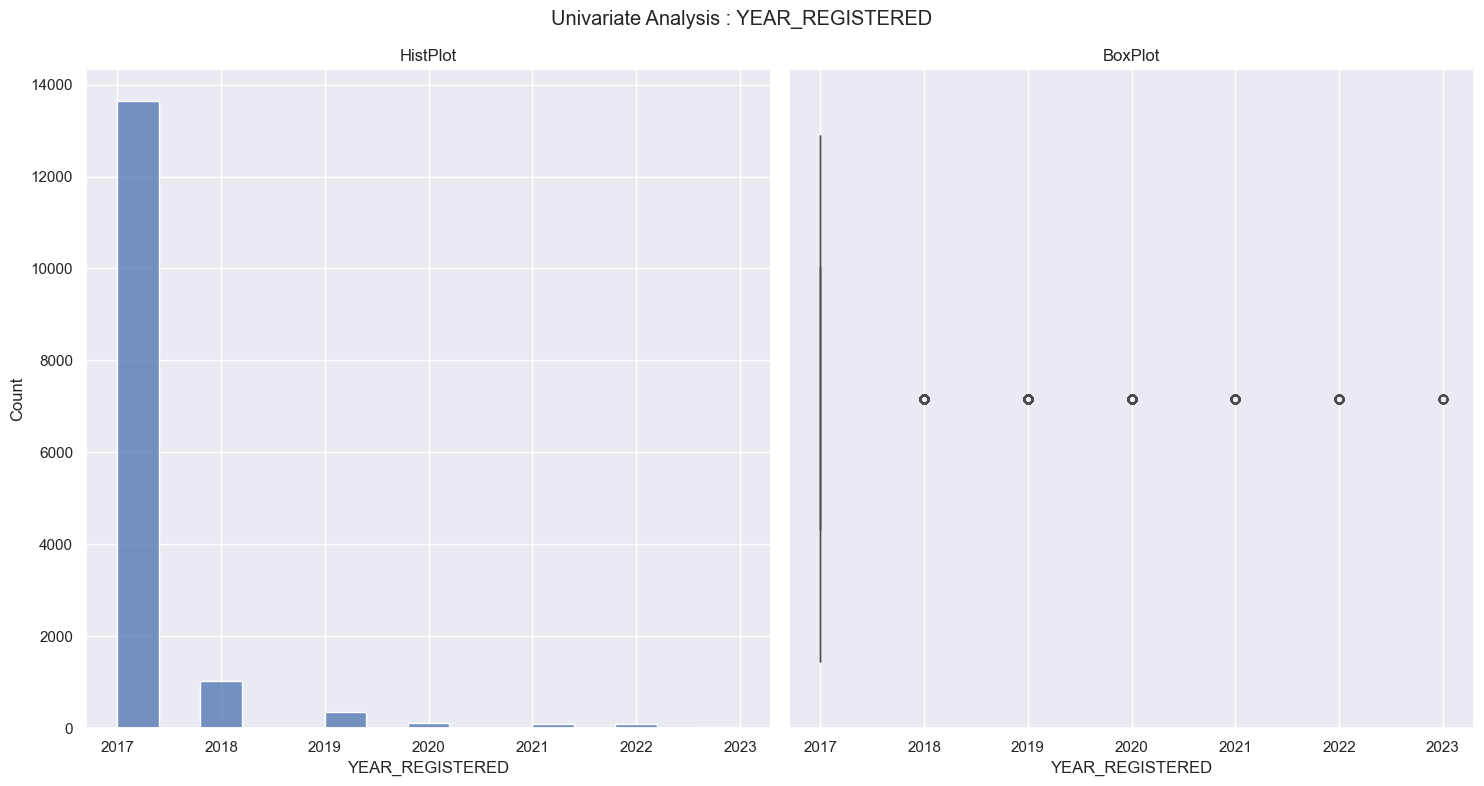

In [146]:
univariate_plot(df_new, "YEAR_REGISTERED")

YEAR BUILT

In [147]:
df_new["YEAR_BUILT"].describe().reset_index().T

0            1          2       3       4       5       6  \
index         count         mean        std     min     25%     50%     75%   
YEAR_BUILT  15332.0  1961.218041  19.058175  1805.0  1955.0  1961.0  1970.0   

                 7  
index          max  
YEAR_BUILT  2022.0

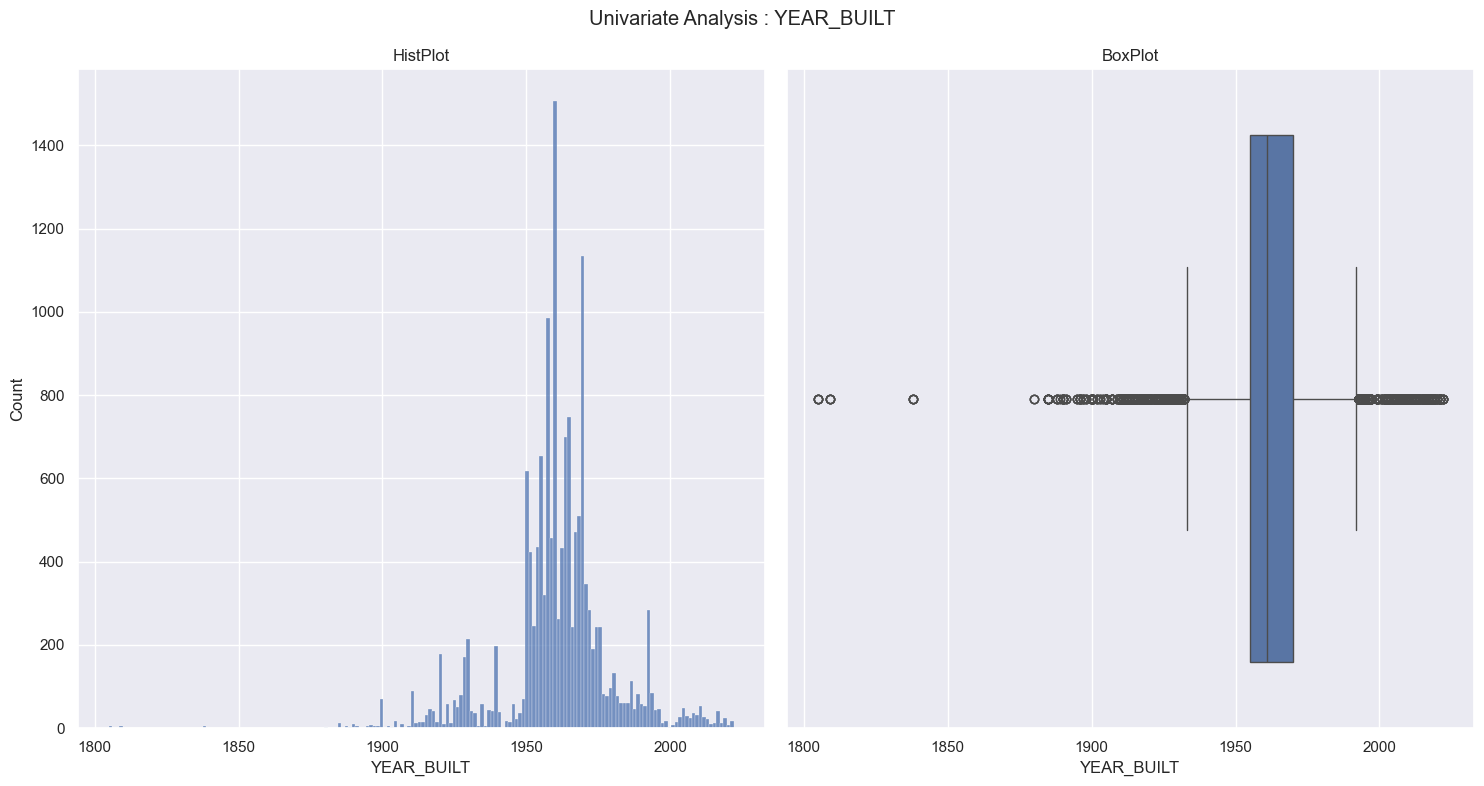

In [148]:
univariate_plot(df_new, "YEAR_BUILT")

YEAR EVALUATED

In [149]:
df_new["YEAR_EVALUATED"].describe().reset_index().T

0            1         2       3       4       5  \
index             count         mean       std     min     25%     50%   
YEAR_EVALUATED  15332.0  2019.957605  2.258698  2017.0  2018.0  2020.0   

                     6       7  
index              75%     max  
YEAR_EVALUATED  2022.0  2024.0

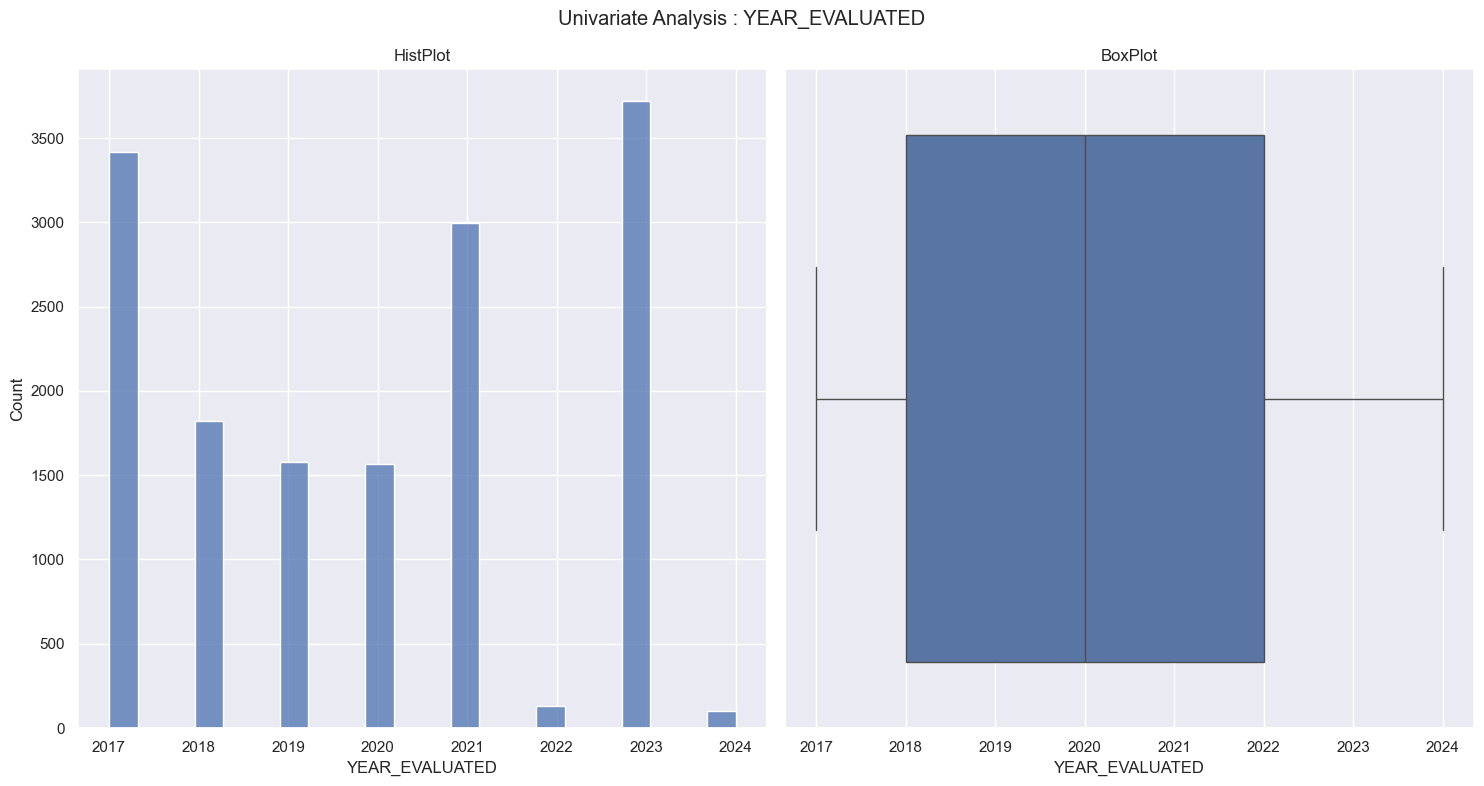

In [150]:
univariate_plot(df_new, "YEAR_EVALUATED")

CONFIRMED STOREYS

In [151]:
df_new["CONFIRMED_STOREYS"].describe().reset_index().T

0       1         2    3    4    5     6     7
index                count    mean       std  min  25%  50%   75%   max
CONFIRMED_STOREYS  15332.0  7.6461  6.290749  3.0  3.0  4.0  10.0  51.0

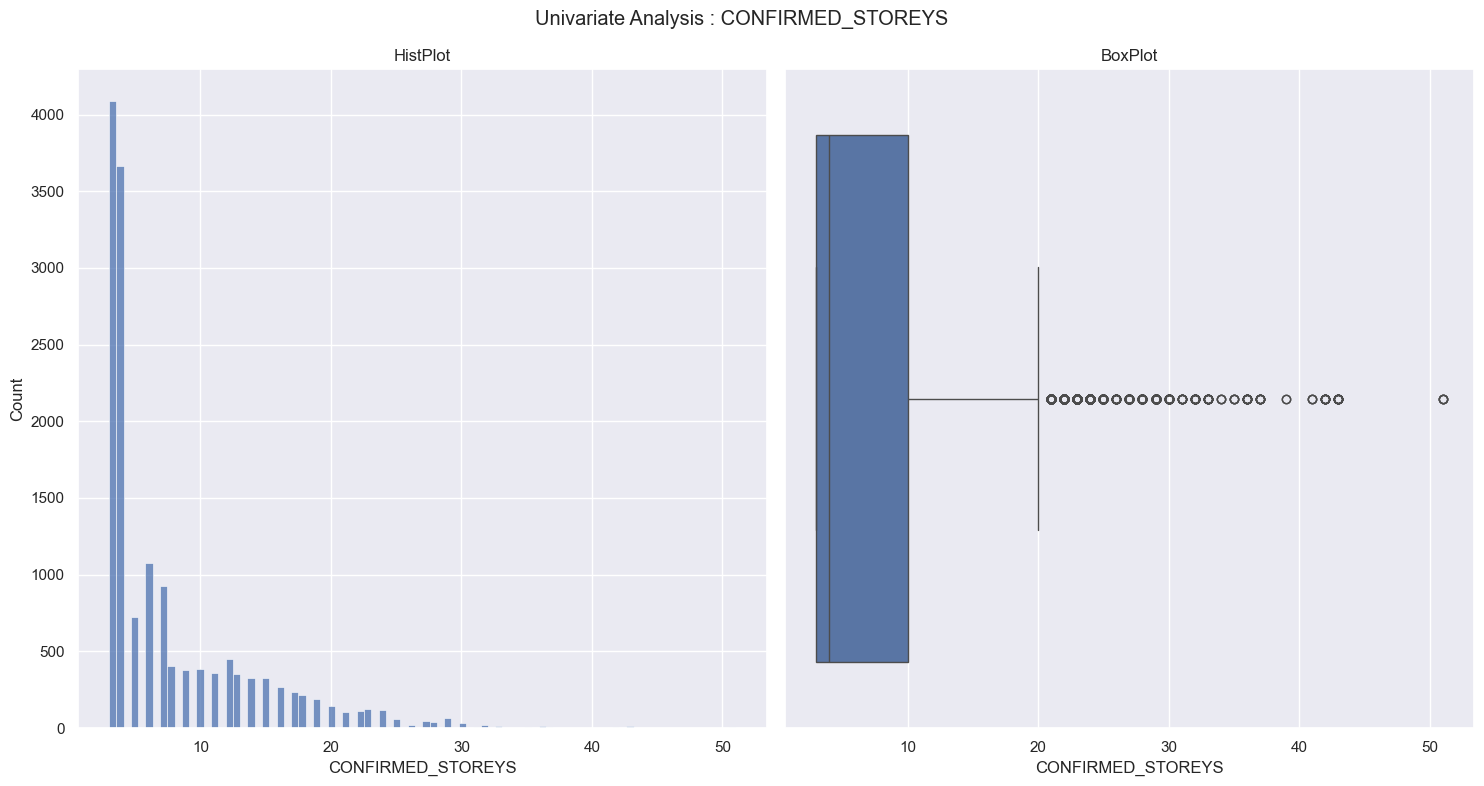

In [152]:
univariate_plot(df_new, "CONFIRMED_STOREYS")

CONFIRMED UNITS

In [153]:
df_new["CONFIRMED_UNITS"].describe().reset_index().T

0          1          2     3     4     5      6      7
index              count       mean        std   min   25%   50%    75%    max
CONFIRMED_UNITS  15332.0  88.060984  95.651765  10.0  24.0  48.0  120.0  793.0

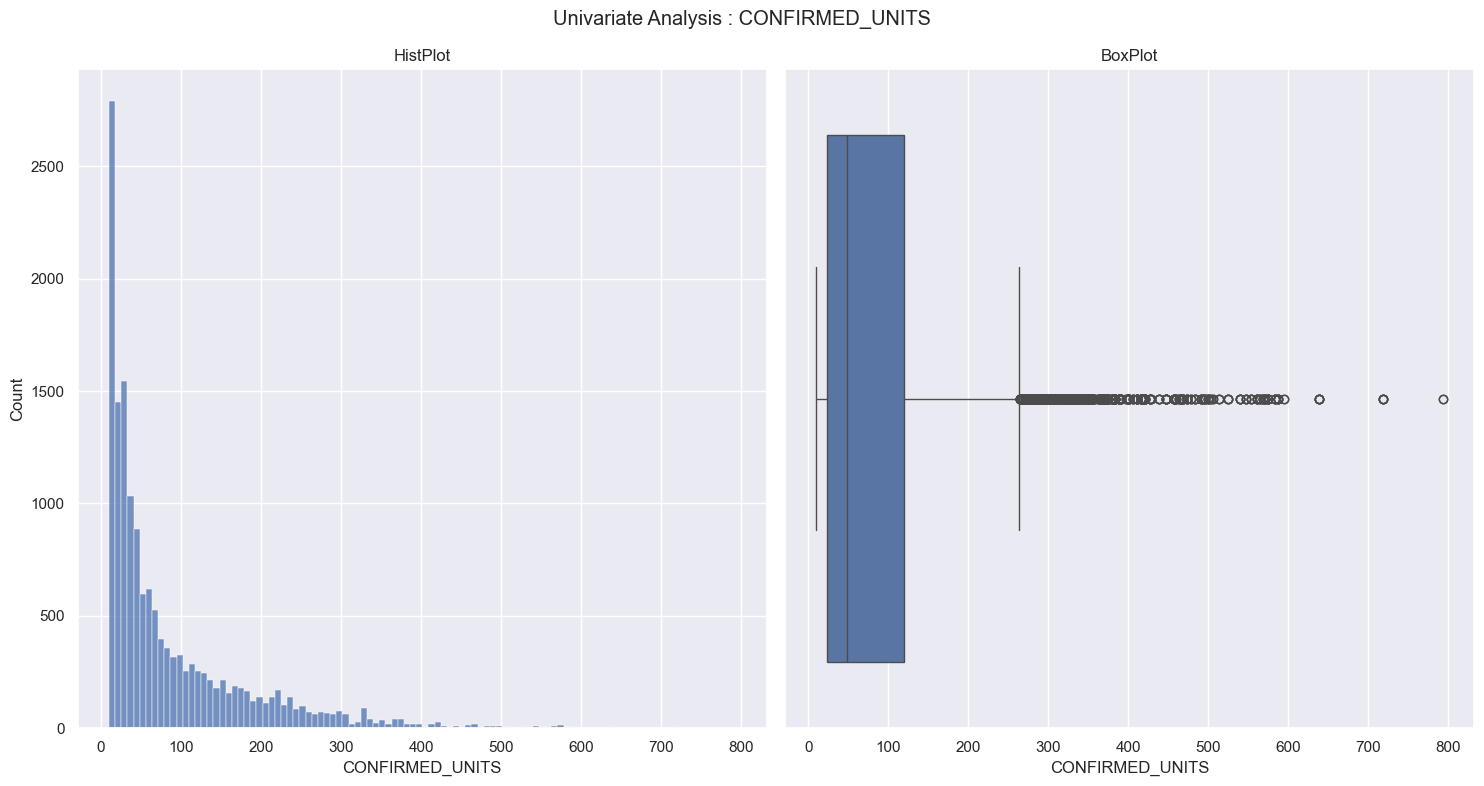

In [154]:
univariate_plot(df_new, "CONFIRMED_UNITS")

CURRENT BUILDING EVAL SCORE

In [155]:
df_new["SCORE"].describe().reset_index().T

0          1          2    3     4     5     6      7
index    count       mean        std  min   25%   50%   75%    max
SCORE  15332.0  75.054266  10.633685  0.0  67.0  76.0  82.0  100.0

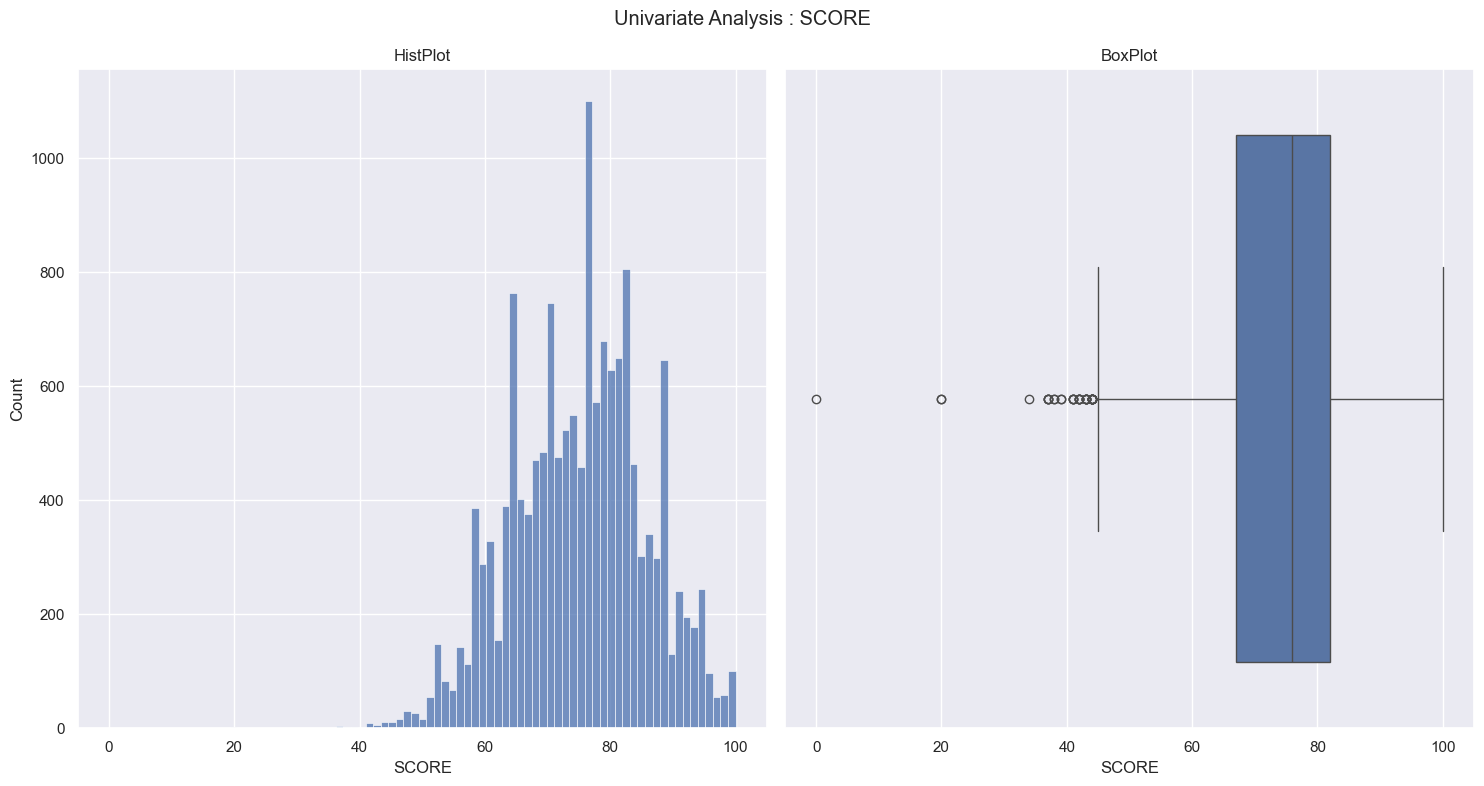

In [156]:
univariate_plot(df_new, "SCORE")

### Bivariate Analysis

YEAR BUILT vs CURRENT BUILDING EVAL SCORE

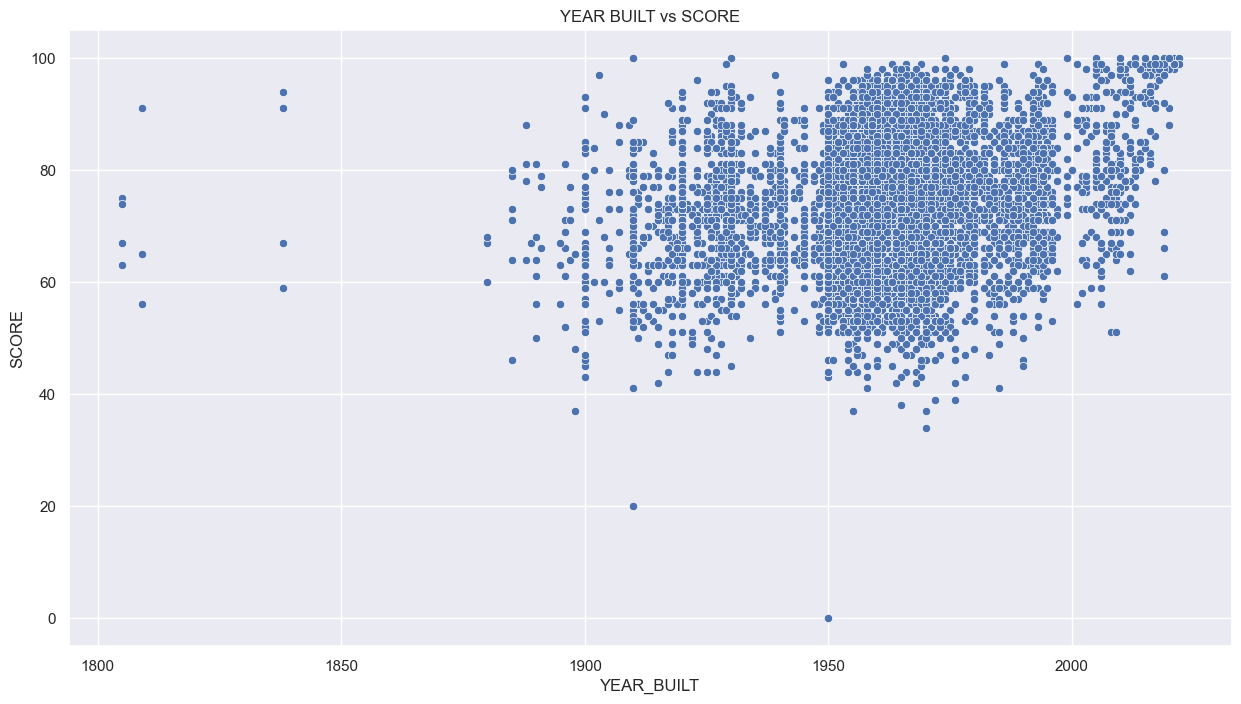

In [157]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_new, x = "YEAR_BUILT", y = "SCORE")
plt.title("YEAR BUILT vs SCORE")
plt.show()

CONFIRMED UNITS vs PROACTIVE BUILDING SCORE

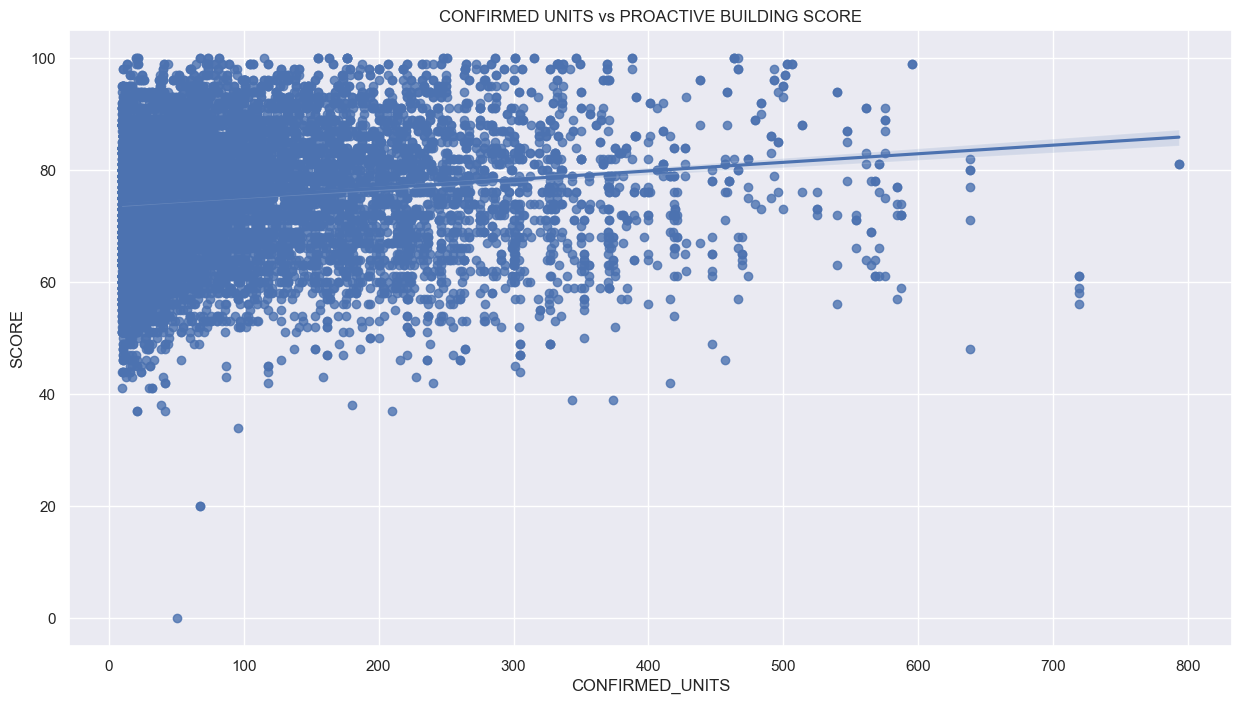

In [158]:
plt.figure(figsize = [15,8])
sns.regplot(data = df_new, x = "CONFIRMED_UNITS", y = "SCORE")
plt.title("CONFIRMED UNITS vs PROACTIVE BUILDING SCORE")
plt.show()

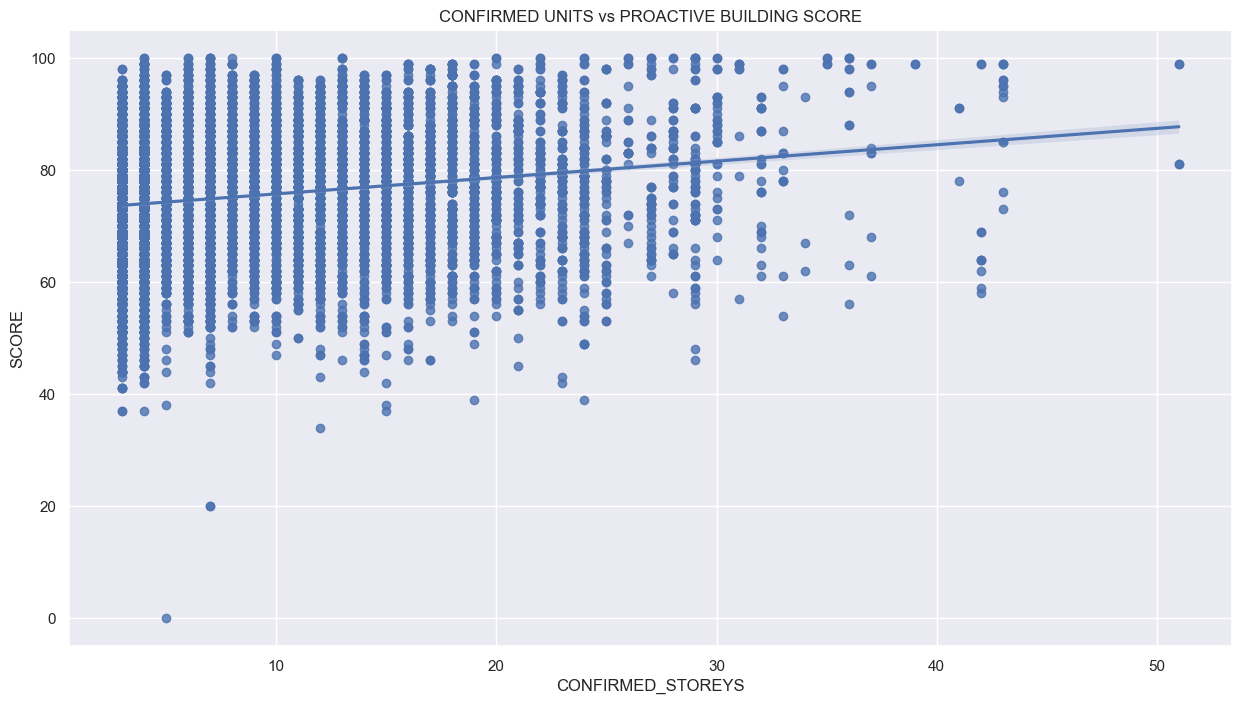

In [159]:
plt.figure(figsize = [15,8])
sns.regplot(data = df_new, x = "CONFIRMED_STOREYS", y = "SCORE")
plt.title("CONFIRMED UNITS vs PROACTIVE BUILDING SCORE")
plt.show()

WARD vs CURRENT BUILDING EVAL SCORE

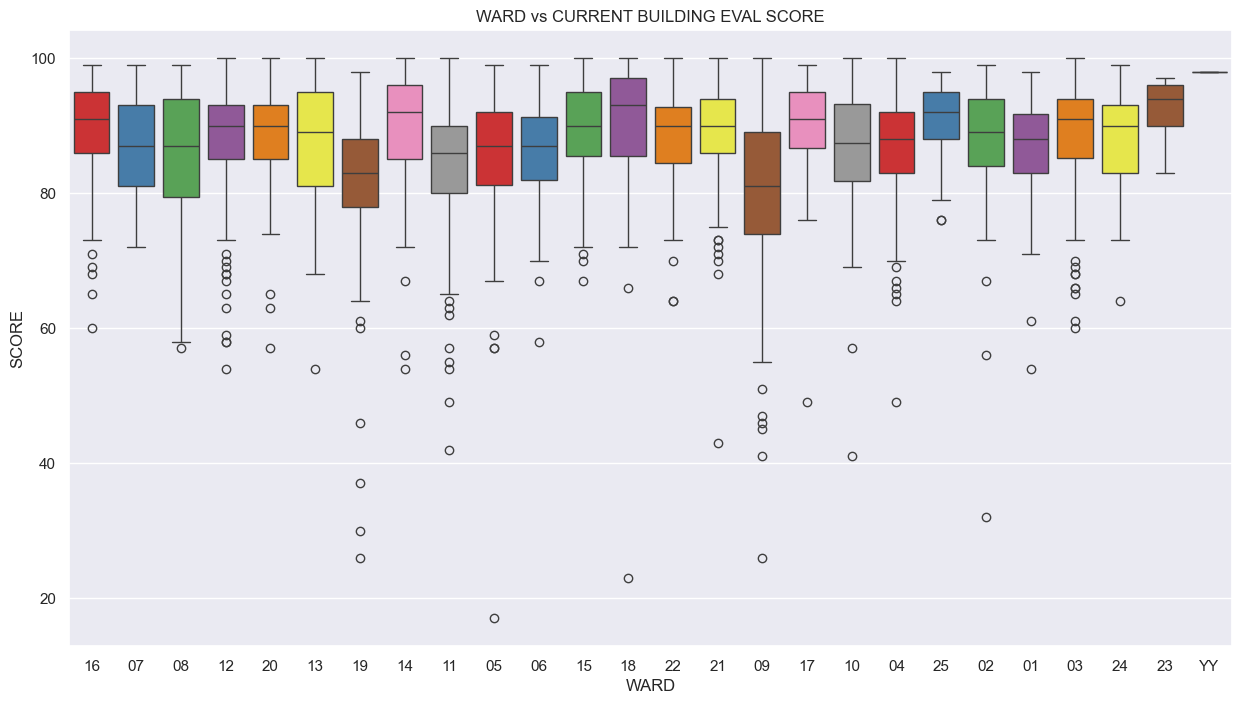

In [160]:
plt.figure(figsize = [15,8])
sns.boxplot(data = df_current, x = "WARD", y = "SCORE", palette = "Set1")
plt.title("WARD vs CURRENT BUILDING EVAL SCORE")
plt.show()

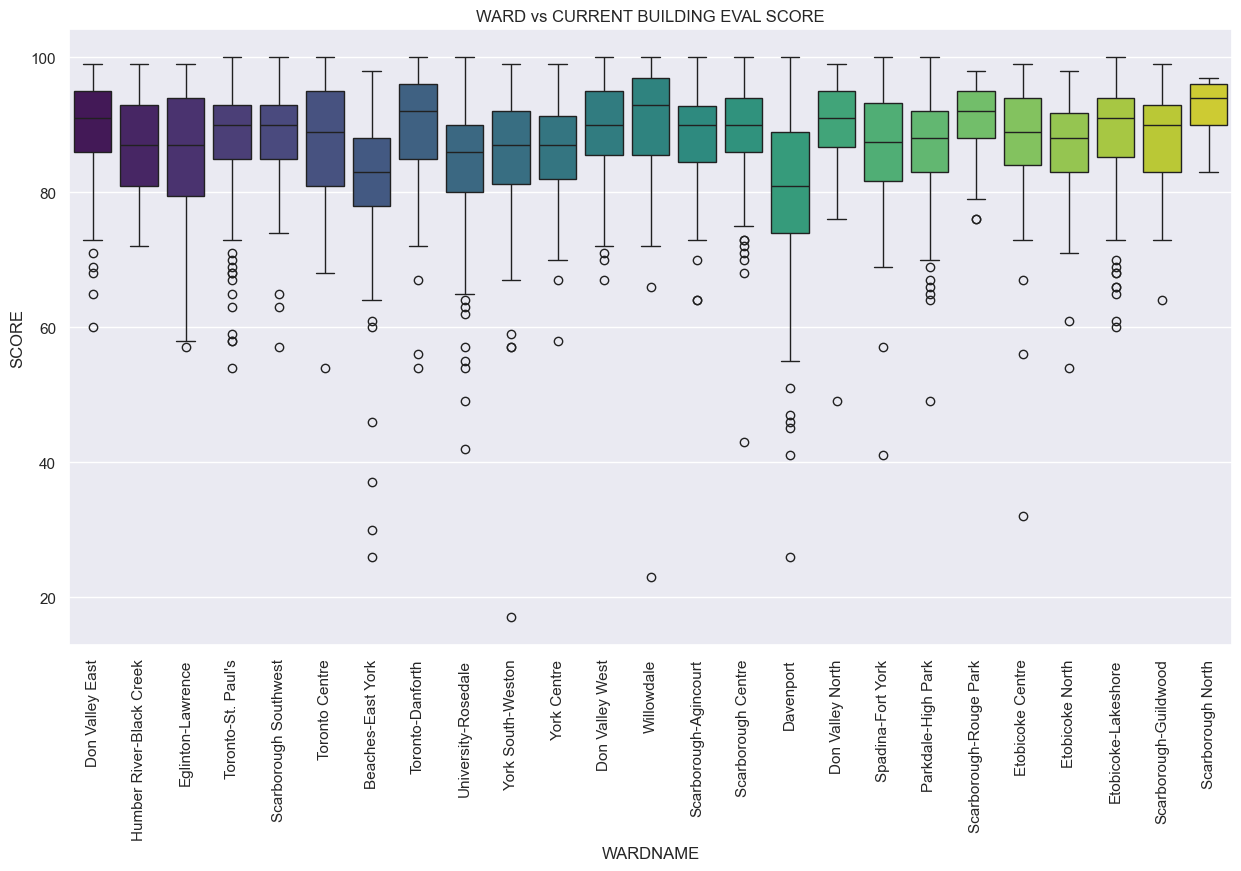

In [161]:
plt.figure(figsize = [15,8])
sns.boxplot(data = df_current, x = "WARDNAME", y = "SCORE", palette = "viridis")
plt.title("WARD vs CURRENT BUILDING EVAL SCORE")
plt.xticks(rotation = 90)
plt.show()

PROPERTY TYPE vs CURRENT REACTIVE SCORE

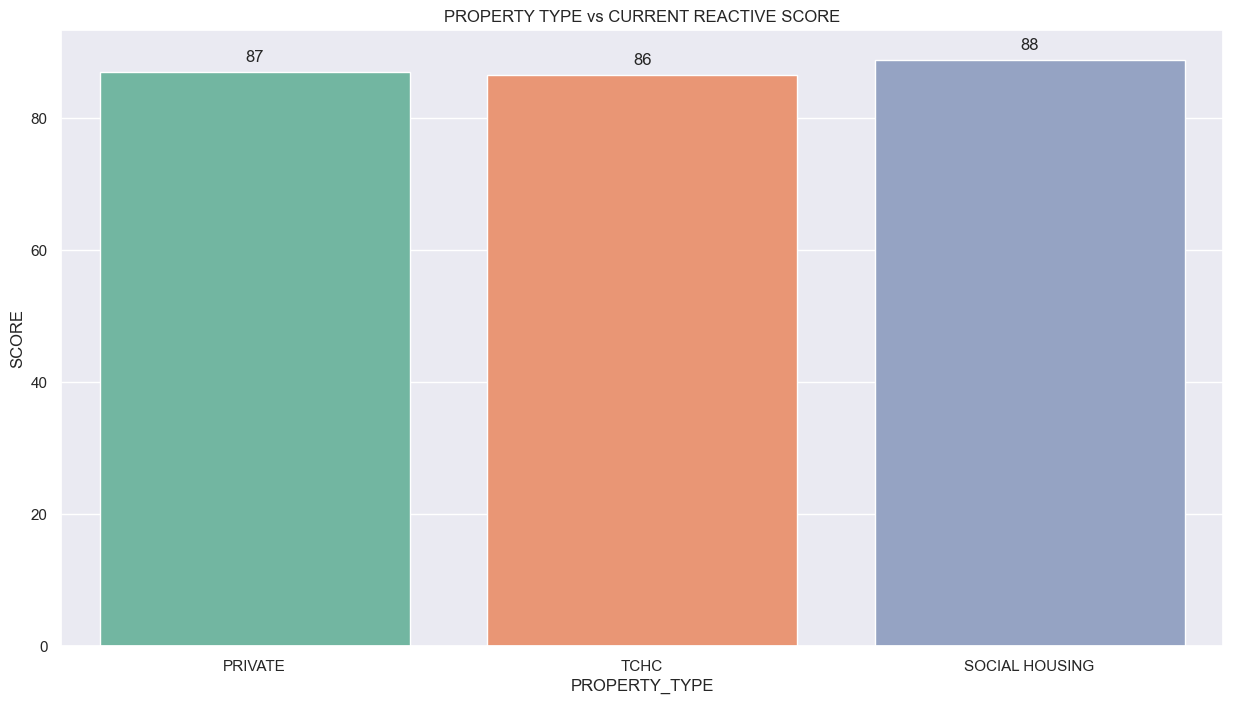

In [162]:
plt.figure(figsize = [15,8])
ax = sns.barplot(data = df_current, x = "PROPERTY_TYPE", y = "SCORE", palette = "Set2", estimator = "mean", errorbar = ("ci", 0))

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "bottom", xytext = (0, 5), textcoords = 'offset points')
    
plt.title("PROPERTY TYPE vs CURRENT REACTIVE SCORE")
plt.show()

YEAR EVALUATED vs CURRENT BUILDING EVAL SCORE

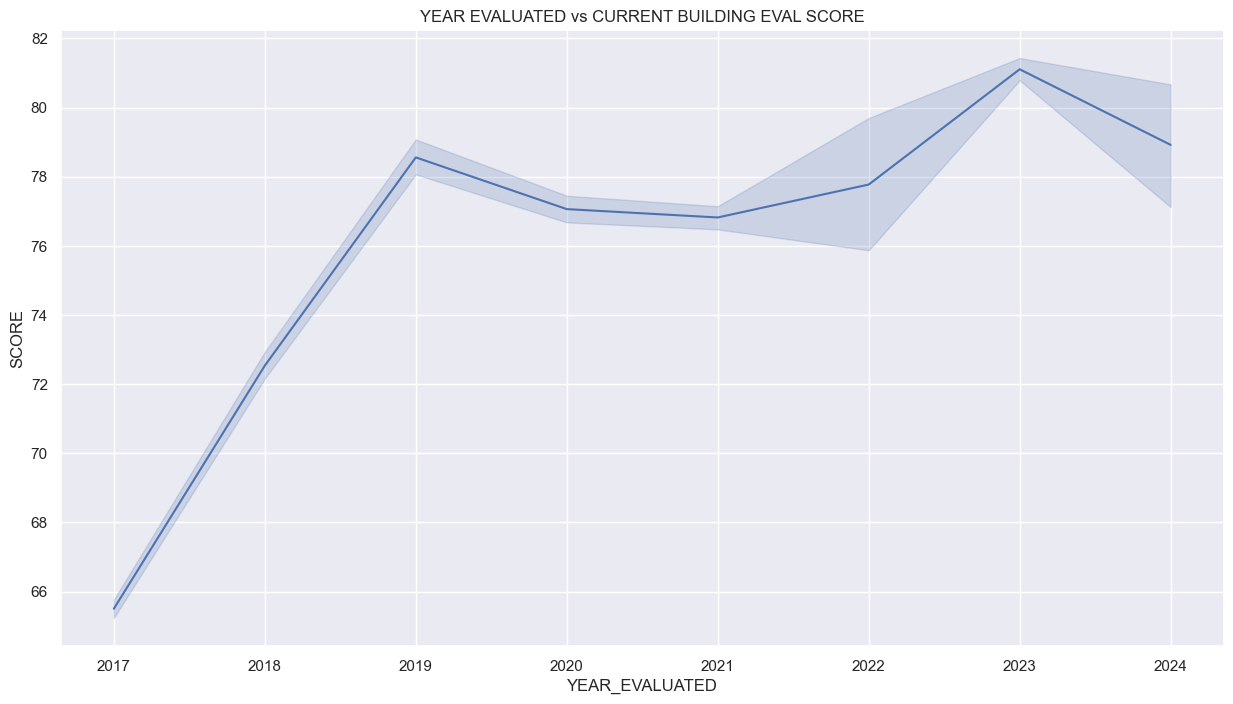

In [163]:
plt.figure(figsize = [15,8])
ax = sns.lineplot(data = df_new, x = "YEAR_EVALUATED", y = "SCORE")

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "bottom", xytext = (0, 5), textcoords = 'offset points')
    
plt.title("YEAR EVALUATED vs CURRENT BUILDING EVAL SCORE")
plt.show()

### Multivariate Analysis

YEAR BUILT, CONFIRMED UNITS, and CURRENT BUILDING EVAL SCORE

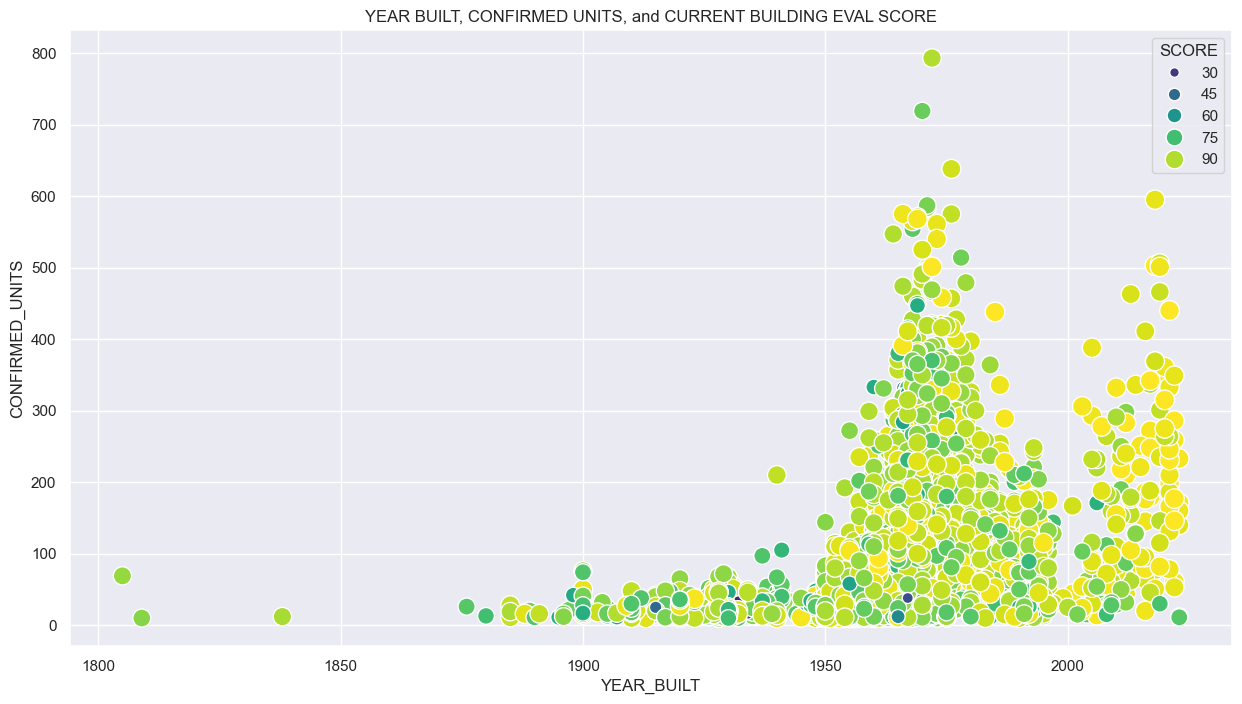

In [164]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df_current, x = 'YEAR_BUILT', y = 'CONFIRMED_UNITS', 
                hue='SCORE', palette = 'viridis', 
                size = 'SCORE', sizes = (20, 200))
plt.title("YEAR BUILT, CONFIRMED UNITS, and CURRENT BUILDING EVAL SCORE")
plt.show()

PROPERTY TYPE, WARD, and PROACTIVE BUILDING SCORE

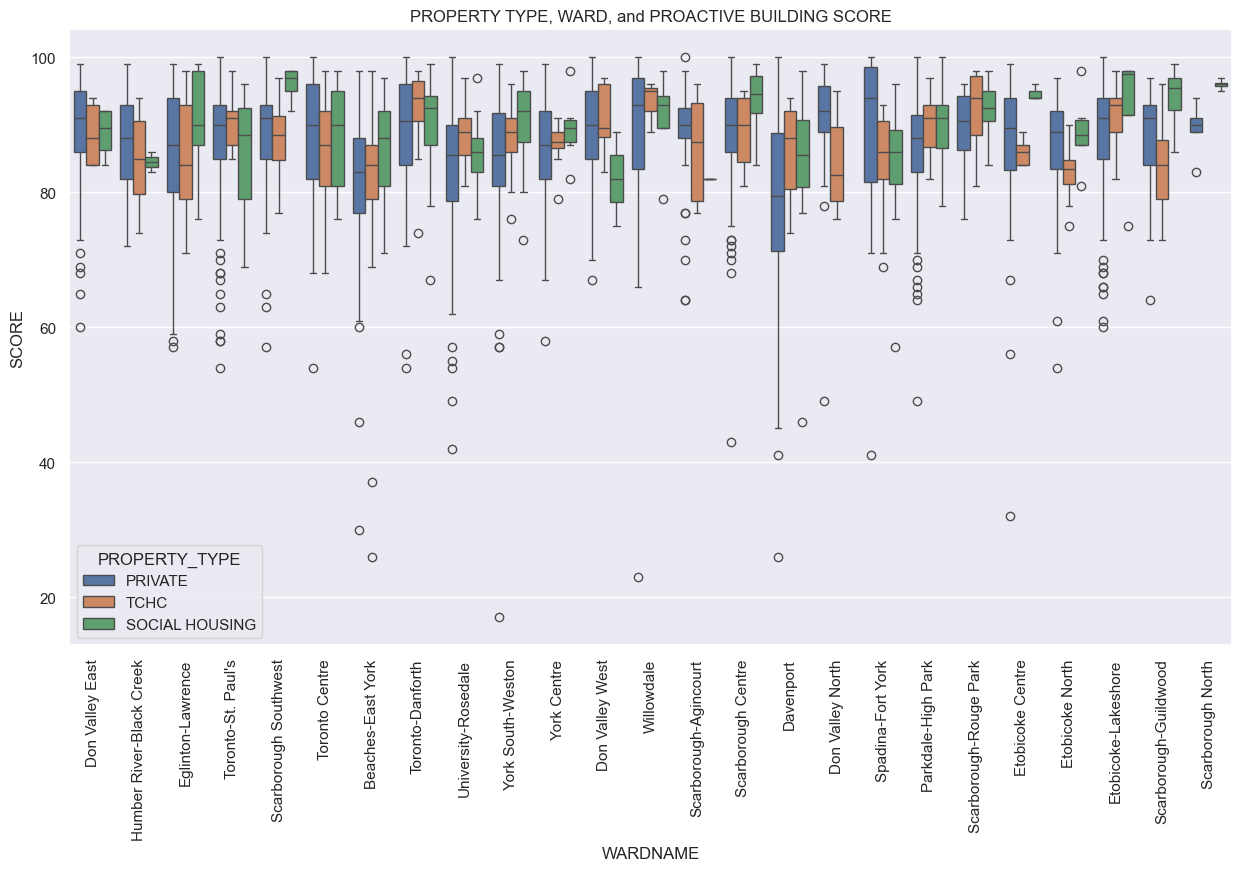

In [165]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_current, x = 'WARDNAME', y = 'SCORE', hue = 'PROPERTY_TYPE')
plt.title('PROPERTY TYPE, WARD, and PROACTIVE BUILDING SCORE')
plt.xticks(rotation = 90)
plt.show()

LATITUDE, LONGITUDE, and CURRENT BUILDING EVAL SCORE

LATITUDE, LONGITUDE, and CURRENT BUILDING EVAL SCORE

In [166]:
fig = px.scatter_mapbox(df_current, 
                        lat = "LATITUDE", 
                        lon = "LONGITUDE", 
                        color = "SCORE",
                        size = "SCORE",
                        hover_name = "SITE_ADDRESS",
                        hover_data = ["YEAR_BUILT", "CONFIRMED_UNITS"],
                        color_continuous_scale = px.colors.sequential.Viridis,
                        size_max = 15,
                        zoom = 10,
                        title = "Building Evaluation Scores Across Toronto")

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":50,"l":0,"b":0}, width = 1500, height = 800)

fig.show()

In [174]:
# Define the file path
file_path = r"D:\St_Clair_Acadamics\Semester_3\DAB_322_Capstone_Project\Project\Apartment_Building_Evaluations_2017_2024.csv"

# Save the dataframe to the specified location
df_new.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")


File saved successfully at: D:\St_Clair_Acadamics\Semester_3\DAB_322_Capstone_Project\Project\Apartment_Building_Evaluations_2017_2024.csv


In [175]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15332 entries, 0 to 3571
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          15332 non-null  int64  
 1   RSN                          15332 non-null  int64  
 2   YEAR_REGISTERED              15332 non-null  int64  
 3   YEAR_EVALUATED               15332 non-null  int64  
 4   YEAR_BUILT                   15332 non-null  int64  
 5   PROPERTY_TYPE                15332 non-null  object 
 6   WARD                         15332 non-null  object 
 7   WARDNAME                     15332 non-null  object 
 8   SITE_ADDRESS                 15332 non-null  object 
 9   CONFIRMED_STOREYS            15332 non-null  int64  
 10  CONFIRMED_UNITS              15332 non-null  int64  
 11  EVALUATION_COMPLETED_ON      15332 non-null  object 
 12  SCORE                        15332 non-null  int64  
 13  RESULTS_OF_SCORE      

In [176]:
df_new['RESULTS_OF_SCORE'].unique()

array(['Evaluation needs to be conducted in 3 years',
       'Evaluation needs to be conducted in 2 years',
       'Evaluation needs to be conducted in 1 year', 'Building Audit'],
      dtype=object)